<a href="https://colab.research.google.com/github/novazi/Credit-Risk-Analysis-and-Prediction/blob/main/credit_risk_analysis_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Nova Zidane Ibrahim (zidaneibrahim.0811@gmail.com) - October 2023.

# **Credit Risk Analysis and Prediction**

### **1. Business Understanding**

In this case, the lending company has to make a decision whether to approve or reject the loan application based on the applicant's profile (every decision has a risk of being good or bad).

1. **Good Risk**:
   - Good risk refers to a situation where the loan applicant has a high probability of repaying their loan.
   - In this case, rejecting their application would be considered a business loss for the lending company.

2. **Bad Risk**:
   - Bad risk refers to a situation where the loan applicant has a low probability of repaying their loan.
   - In this case, approving their application would be considered a financial loss for the lending company.

The data provided contains information about the applicant's previous loans and whether they have been recorded as good risk or bad risk. When an applicant applies for a loan, there are two types of risks that can occur:

1. **Good Risk** consists of fully repaid loan status ("Fully Paid"), current loan status ("Current"), and "In Grace Period" status. Applicants with this label are more likely to get loan approval in the future.

2. **Bad Risk** consists of loan status that is late in repayment ("Late"), "Default" status (non-compliance with the loan agreement), and "Charged Off" status (the lending company does not expect repayment). Applicants with these labels are less likely to get loan approval in the future.

In essence, lending companies use this historical data to help them predict the credit risk of new applicants, so they can make smart decisions in approving or rejecting loan applications. This helps them reduce the risk of financial loss and optimise their business operations.

#### 1.1 Problem Statement

Lending to applicants with Bad Risk is the biggest cause of financial loss. Credit losses are the amount of money lost by lenders when applicants refuse to pay or run away with money they should have paid.

#### 1.2 Objective

1. **Identify Patterns Indicating Bad Risk**

    The first objective is to recognize patterns in the data that indicate a person is less likely to be able to repay a loan or is considered a `"Bad Risk"`. This information will be used to take actions, such as rejecting the loan application, reducing the approved loan amount, or setting a higher interest rate, to compensate for the higher risk.

2. **Implementation of Machine Learning Algorithms to Build Predictive Models**

    The second objective is to apply machine learning algorithms to create predictive models. This model will allow the company to automatically predict whether the loan application submitted by the applicant will be labeled as a `"Bad Risk"` or not. With this, the company can approve or reject the loan application.

### **2. Data Understanding**

#### 2.1 Import Library

In [1]:
# import libraries
import pandas as pd             # data processing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)
import numpy as np              # algebra operation
import seaborn as sns           # visualization
import matplotlib.pyplot as plt # visualization
import warnings                 # ignores any warning
warnings.filterwarnings("ignore")

#### 2.2 Import Dataset

In [2]:
# import dataset
df = pd.read_csv('https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv', sep=',')
print('This dataset has %d rows dan %d columns.\n' % df.shape)
df.head()

This dataset has 466285 rows dan 75 columns.



,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.000000,36 months,10.650000,162.870000,B,B2,NaN,10+ years,RENT,24000.000000,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650000,0.000000,Jan-85,1.000000,NaN,NaN,3.000000,0.000000,13648,83.700000,9.000000,f,0.000000,0.000000,5861.071414,5831.780000,5000.000000,861.070000,0.000000,0.000000,0.000000,Jan-15,171.620000,NaN,Jan-16,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.000000,60 months,15.270000,59.830000,C,C4,Ryder,< 1 year,RENT,30000.000000,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000000,0.000000,Apr-99,5.000000,NaN,NaN,3.000000,0.000000,1687,9.400000,4.000000,f,0.000000,0.000000,1008.710000,1008.710000,456.460000,435.170000,0.000000,117.080000,1.110000,Apr-13,119.660000,NaN,Sep-13,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.000000,36 months,15.960000,84.330000,C,C5,NaN,10+ years,RENT,12252.000000,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.720000,0.000000,Nov-01,2.000000,NaN,NaN,2.000000,0.000000,2956,98.500000,10.000000,f,0.000000,0.000000,3003.653644,3003.650000,2400.000000,603.650000,0.000000,0.000000,0.000000,Jun-14,649.910000,NaN,Jan-16,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.000000,36 months,13.490000,339.310000,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000000,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000000,0.000000,Feb-96,1.000000,35.000000,NaN,10.000000,0.000000,5598,21.000000,37.000000,f,0.000000,0.000000,12226.302210,12226.300000,10000.000000,2209.330000,16.970000,0.000000,0.000000,Jan-15,357.480000,NaN,Jan-15,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.000000,60 months,12.690000,67.790000,B,B5,University Medical Group,1 year,RENT,80000.000000,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.940000,0.000000,Jan-96,0.000000,38.000000,NaN,15.000000,0.000000,27783,53.900000,38.000000,f,766.900000,766.900000,3242.170000,3242.170000,2233.100000,1009.070000,0.000000,0.000000,0.000000,Jan-16,67.790000,Feb-16,Jan-16,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset ini memiliki 75 fitur dan 466.285 baris yang mengandung informasi terkait history aplikasi peminjaman sebelumnya. Selanjutnya, kita mengecek untuk unique value, missing value dari masing-masing kolom berdasarkan fungsi di bawah ini.

#### 2.3 Check Missing Values, Unique Values, Data Type, and Data Cleansing

In [3]:
def check_data(data):
    return (pd.DataFrame({'type':data.dtypes,
                         'amount_unique':data.nunique(),
                         'unique_values':[data[x].unique() for x in data.columns],
                         'missing_values':data.isna().sum(),
                         'percentage_missing_values(%)':round((data.isnull().sum()/data.shape[0])*100, 2)
                         }))

print('Data Type and Columns Before Correction:\n')
check_data(df).sort_values("missing_values", ascending=False)

Data Type and Columns Before Correction:



,type,amount_unique,unique_values,missing_values,percentage_missing_values(%)
inq_last_12m,float64,0,[nan],466285,100.000000
total_bal_il,float64,0,[nan],466285,100.000000
dti_joint,float64,0,[nan],466285,100.000000
verification_status_joint,float64,0,[nan],466285,100.000000
annual_inc_joint,float64,0,[nan],466285,100.000000
open_acc_6m,float64,0,[nan],466285,100.000000
open_il_6m,float64,0,[nan],466285,100.000000
open_il_12m,float64,0,[nan],466285,100.000000
open_il_24m,float64,0,[nan],466285,100.000000
mths_since_rcnt_il,float64,0,[nan],466285,100.000000


Dari hasil pengecekan yang dilakukan, terdapat beberapa hal yang perlu dibahas:
1. **Kolom NaN Full**

    Dataset ini juga memiliki Kolom NaN, maksudnya adalah kolom tersebut tidak memiliki nilai atau hanya terdiri dari nilai NaN. Kolom-kolom tersebut adalah sebagai berikut:
    1. `annual_inc_joint`
    2. `dti_joint`
    3. `verification_status_joint`
    4. `open_acc_6m`
    5. `open_il_6m`
    6. `open_il_12m`
    7. `open_il_24m`
    8. `mths_since_rcnt_il`
    9. `total_bal_il`
    10. `il_util`
    11. `open_rv_12m`
    12. `open_rv_24m`
    13. `max_bal_bc`
    14. `all_util`
    15. `inq_fi`
    16. `total_cu_tl`
    17. `inq_last_12m`
    
    Kolom-kolom ini akan dihapuskan karena tidak berguna dalam analisis dan pembuatan model prediksi nantinya.

2. **Kolom dengan Persentase Missing Values di atas 50%**
    
    Kolom yang dimaksud adalah kolom yang memiliki persentase missing values di atas 50%. Kolom-kolom ini sudah tidak berguna karena jika dilakukan imputasi sekalipun, hasil analisisnya menjadi tidak robust dan cenderung bias. Berikut ini kolom-kolom dalam kategori ini.
    1. `mths_since_last_record`
    2. `mths_since_last_major_derog`
    3. `desc`
    4. `mths_since_last_delinq`

    Kolom-kolom tersebut akan dihapuskan karena tidak berguna dalam analisis dan pembuatan model prediksi nantinya.

3. **Kolom dengan Tipe Kategorikal yang Banyak Memiliki Unique Values atau Hanya memiliki 1 Unique Value**

    Berikut ini kolom-kolom dalam kategori ini.
    1. `url`
    2. `zip_code`
    3. `addr_state`
    4. `emp_title`
    5. `title`
    6. `application_type`
    
    Kolom-kolom ini akan dihapuskan karena tidak berguna dalam analisis dan pembuatan model prediksi nantinya serta tidak memberikan informasi yang dibutuhkan.

4. **Kolom dengan Tipe Numerical yang Semuanya Unique Value atau Hanya Memiliki 1 Unique Value**
    
    Berikut ini kolom-kolom dalam kategori ini.
    1. `Unnamed: 0`
    2. `id`
    3. `member_id`
    4. `policy_code`

    Kolom-kolom ini akan dihapuskan karena tidak berguna dalam analisis dan pembuatan model prediksi nantinya serta tidak memberikan informasi yang dibutuhkan.

In [4]:
# drop unnecessary features
df.drop(["annual_inc_joint","dti_joint","verification_status_joint","open_acc_6m",
         "open_il_6m","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il",
         "il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","inq_fi",
         "total_cu_tl","inq_last_12m","mths_since_last_record","mths_since_last_major_derog",
         "desc","mths_since_last_delinq","url","zip_code","addr_state","emp_title","title",
         "application_type","Unnamed: 0","id","member_id","policy_code"], inplace=True, axis=1)

Dari hasil pengecekan tipe data dari masing-masing kolom, `issue_d`, `earliest_cr_line`, `last_pymnt_d`, `next_pymnt_d`, dan `last_credit_pull_d` bertipe data **object** yang seharusnya bertipe **datetime**. Oleh karena itu, kelima kolom tersebut akan diubah tipe datanya menjadi format datetime.

In [5]:
def date_time(dt):
    if dt.year > 2016:
      dt = dt.replace(year=dt.year-100)
    return dt

# convert object to datetime
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: date_time(x))
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'],format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'],format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'],format='%b-%y')
df[['earliest_cr_line', 'issue_d', 'next_pymnt_d', 'last_pymnt_d', 'last_credit_pull_d']].head()

,earliest_cr_line,issue_d,next_pymnt_d,last_pymnt_d,last_credit_pull_d
0,1985-01-01,2011-12-01,NaT,2015-01-01,2016-01-01
1,1999-04-01,2011-12-01,NaT,2013-04-01,2013-09-01
2,2001-11-01,2011-12-01,NaT,2014-06-01,2016-01-01
3,1996-02-01,2011-12-01,NaT,2015-01-01,2015-01-01
4,1996-01-01,2011-12-01,2016-02-01,2016-01-01,2016-01-01


In [6]:
print('Data Type and Columns After Correction:\n')
check_data(df).sort_values("missing_values", ascending=False)

Data Type and Columns After Correction:



,type,amount_unique,unique_values,missing_values,percentage_missing_values(%)
next_pymnt_d,datetime64[ns],100,"[NaT, 2016-02-01T00:00:00.000000000, 2016-01-0...",227214,48.730000
total_rev_hi_lim,float64,14612,"[nan, 59900.0, 15100.0, 61100.0, 8100.0, 15400...",70276,15.070000
tot_cur_bal,float64,220690,"[nan, 114834.0, 14123.0, 267646.0, 13605.0, 27...",70276,15.070000
tot_coll_amt,float64,6321,"[nan, 0.0, 15386.0, 1514.0, 154.0, 539.0, 92.0...",70276,15.070000
emp_length,object,11,"[10+ years, < 1 year, 1 year, 3 years, 8 years...",21008,4.510000
last_pymnt_d,datetime64[ns],98,"[2015-01-01T00:00:00.000000000, 2013-04-01T00:...",376,0.080000
revol_util,float64,1269,"[83.7, 9.4, 98.5, 21.0, 53.9, 28.3, 85.6, 87.5...",340,0.070000
collections_12_mths_ex_med,float64,9,"[0.0, nan, 1.0, 2.0, 4.0, 3.0, 6.0, 16.0, 20.0...",145,0.030000
last_credit_pull_d,datetime64[ns],103,"[2016-01-01T00:00:00.000000000, 2013-09-01T00:...",42,0.010000
inq_last_6mths,float64,28,"[1.0, 5.0, 2.0, 0.0, 3.0, 4.0, 6.0, 7.0, 8.0, ...",29,0.010000


<Axes: xlabel='acc_now_delinq', ylabel='Density'>

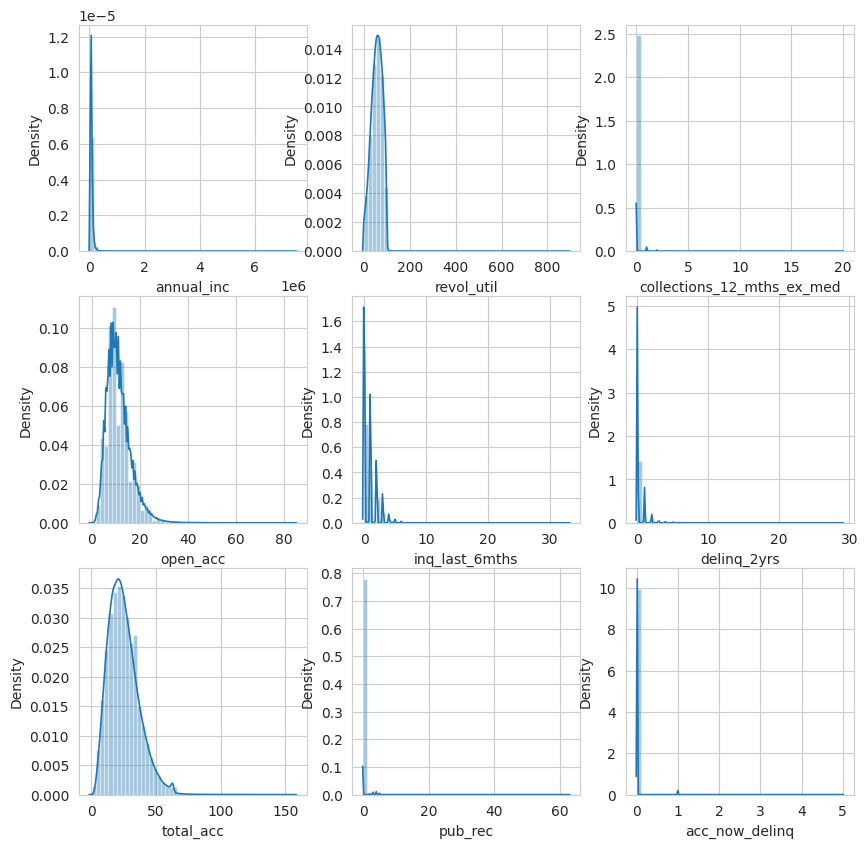

In [7]:
# distribution of numerical features that have missing values
sns.set_style('whitegrid')
fig, ax = plt.subplots(3,3, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(df['annual_inc'], ax=ax[0][0])
sns.distplot(df['revol_util'], ax=ax[0][1])
sns.distplot(df['collections_12_mths_ex_med'], ax=ax[0][2])
sns.distplot(df['open_acc'], ax=ax[1][0])
sns.distplot(df['inq_last_6mths'], ax=ax[1][1])
sns.distplot(df['delinq_2yrs'], ax=ax[1][2])
sns.distplot(df['total_acc'], ax=ax[2][0])
sns.distplot(df['pub_rec'], ax=ax[2][1])
sns.distplot(df['acc_now_delinq'], ax=ax[2][2])

Untuk mengatasi missing value dalam fitur-fitur numerik yang memiliki distribusi data yang skewed (condong), untuk menggantikan (imputasi) missing value dengan menggunakan nilai median dari fitur tersebut. Median adalah nilai tengah dalam distribusi data dan seringkali lebih stabil daripada mean (rata-rata) dalam kasus distribusi data yang skewed.

In [8]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

cat_columns = df.select_dtypes(include=['object','datetime64[ns]']).columns.tolist()
num_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in cat_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].median())

In [9]:
# after imputation
print('Missing values status:', df.isnull().values.any())

Missing values status: False


#### 2.4 Statistical Summary

##### Numerical Features

In [10]:
numerical = df.select_dtypes(include=['int64', 'float64'])
print('The number of numerical features is {}'.format(numerical.shape[1]))

The number of numerical features is 29


In [11]:
numerical.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.000000,14317.277577,8286.509164,500.000000,8000.000000,12000.000000,20000.000000,35000.000000
funded_amnt,466285.000000,14291.801044,8274.371300,500.000000,8000.000000,12000.000000,20000.000000,35000.000000
funded_amnt_inv,466285.000000,14222.329888,8297.637788,0.000000,8000.000000,12000.000000,19950.000000,35000.000000
int_rate,466285.000000,13.829236,4.357587,5.420000,10.990000,13.660000,16.490000,26.060000
installment,466285.000000,432.061201,243.485550,15.670000,256.690000,379.890000,566.580000,1409.990000
annual_inc,466285.000000,73277.293307,54963.341145,1896.000000,45000.000000,63000.000000,88953.000000,7500000.000000
dti,466285.000000,17.218758,7.851121,0.000000,11.360000,16.870000,22.780000,39.990000
delinq_2yrs,466285.000000,0.284661,0.797343,0.000000,0.000000,0.000000,0.000000,29.000000
inq_last_6mths,466285.000000,0.804695,1.091583,0.000000,0.000000,0.000000,1.000000,33.000000
open_acc,466285.000000,11.186995,4.987380,0.000000,8.000000,10.000000,14.000000,84.000000


##### Categorical Features

In [12]:
categorical = df.select_dtypes(include=['object'])
print('The number of categorical features is {}'.format(categorical.shape[1]))

The number of categorical features is 10


In [13]:
categorical.describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_length,466285,11,10+ years,171057
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276
purpose,466285,14,debt_consolidation,274195
initial_list_status,466285,2,f,303005


##### Datetime Features

In [14]:
datetime_feat = df.select_dtypes(include=['datetime64[ns]'])
print('The number of datetime features is {}'.format(datetime_feat.shape[1]))

The number of datetime features is 5


In [15]:
datetime_feat.describe().transpose()

,count,unique,top,freq,first,last
issue_d,466285,91,2014-10-01,38782,2007-06-01,2014-12-01
earliest_cr_line,466285,664,2000-10-01,3703,1944-01-01,2011-11-01
last_pymnt_d,466285,98,2016-01-01,179996,2007-12-01,2016-01-01
next_pymnt_d,466285,100,2016-02-01,435607,2007-12-01,2016-03-01
last_credit_pull_d,466285,103,2016-01-01,327741,2007-05-01,2016-01-01


### **3. Data Preparation**

#### 3.1 Create Target Feature

In [16]:
unique_loan_status = df["loan_status"].unique()
print(unique_loan_status)

['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


Dalam pengecekannya, status pinjaman terdiri dari 6 nilai (Fully Paid, Current, In Grace Period, Late, Default, dan Charged Off). Nilai-nilai ini menguraikan definisi berbagai status pinjaman dan kemudian menyusun kriteria untuk mengelompokkan status pinjaman ke dalam dua kelas: `Good Risk` dan `Bad Risk`. Berikut adalah inti dari penjelasan tersebut:

1. Fully Paid: Ini mengindikasikan bahwa pinjaman telah sepenuhnya dilunasi, baik pada akhir jangka waktu pinjaman atau lebih awal karena pelunasan dini. Ini adalah tanda bahwa pemohon telah memenuhi kewajiban pinjaman dengan baik.

2. Current: Ini berarti pemohon sedang membayar pinjaman tepat waktu. Tidak ada keterlambatan pembayaran atau masalah dalam status pembayaran.

3. In Grace Period: Ini adalah periode tertentu setelah tanggal jatuh tempo di mana pembayaran masih dapat dilakukan tanpa denda. Keterlambatan dalam periode ini tidak akan memengaruhi catatan kredit pemohon.

4. Late: Ini menunjukkan bahwa pemohon telah gagal membayar tepat waktu dalam periode penangguhan pembayaran. Ada beberapa tingkatan keterlambatan, seperti 16-30 hari terlambat atau 31-120 hari terlambat.

5. Default: Ini terjadi ketika pemohon gagal membayar pinjaman sesuai dengan perjanjian awal, dan perusahaan pemberi pinjaman mengakhiri perjanjian tersebut. Ini dapat mengakibatkan penurunan signifikan dalam catatan kredit dan bisa berakibat pada penyitaan properti pribadi.

6. Charged Off: Ini terjadi ketika pemohon telah terlambat membayar utang mereka selama beberapa bulan, dan perusahaan pemberi pinjaman telah menganggap utang tersebut sebagai utang buruk. Ini berarti perusahaan menganggap bahwa tidak mungkin untuk mengumpulkan dana yang belum dibayar.

Berdasarkan penjelasan di atas, pemahaman diambil bahwa `Good Risk` melibatkan status pinjaman yang menunjukkan pemohon dapat membayar pinjaman dengan baik dan tidak akan berdampak buruk pada catatan kredit, seperti **Fully Paid**, **Current**, dan **In Grace Period**. Sementara `Bad Risk` melibatkan status pinjaman yang menunjukkan risiko tinggi bahwa pemohon mungkin tidak akan dapat membayar pinjaman atau dapat berdampak buruk pada catatan kredit mereka, seperti **Late**, **Default**, dan **Charged Off**. Klasifikasi ini digunakan untuk membantu perusahaan dalam pengambilan keputusan terkait persetujuan atau penolakan aplikasi pinjaman.

In [17]:
# create target feature
df['risk_status'] = np.where((df['loan_status'] =='Charged Off') |
                         (df['loan_status'] =='Default') |
                         (df['loan_status'] =='Late (31-120 days)') |
                         (df['loan_status'] =='Late (16-30 days)') |
                         (df['loan_status'] =='Does not meet the credit policy. Status:Charged Off'),'Bad Risk','Good Risk')

In [18]:
# drop unnecessary features
df.drop(['loan_status'], inplace=True, axis=1)

`risk_status` akan menjadi fitur target dalam model prediksi nantinya.

#### **3.2 Exploratory Data Analysis**

##### 3.2.1 Examine the Target Variable

Number of Risk Status:
Good Risk: 414099 => 88.81 %
Bad Risk :  52186 => 11.19 %


Text(0.5, 1.0, 'Number of Risk Status')

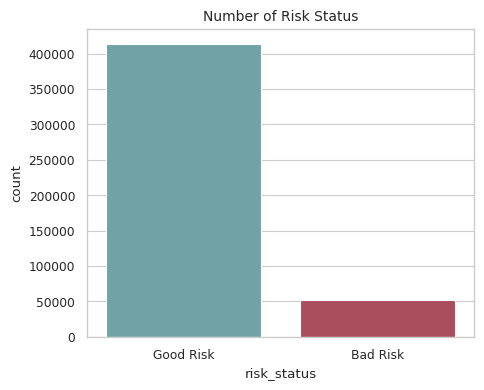

In [19]:
# count of value in risk status
print("Number of Risk Status:")
counts = df['risk_status'].value_counts()
percentages = counts / counts.sum() * 100
print('Good Risk:', counts[0], '=>', round(percentages[0], 2),'%')
print('Bad Risk : ', counts[1], '=>', round(percentages[1], 2),'%')

# visualize target variable with bar chart
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='risk_status', data=df, palette =["#68abad", "#ba3d51"])
#for p in ax.patches:
#    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                ha='center', va='center', xytext=(0, 7), textcoords='offset points')
plt.ylabel('count')
plt.title('Number of Risk Status', fontsize=10)

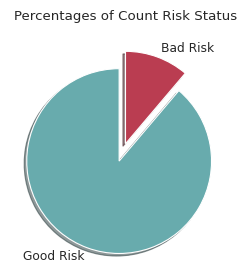

In [20]:
# visualize target variable with pie chart
plt.figure(figsize=(3, 3))
plt.pie(x=df['risk_status'].value_counts(), labels=df['risk_status'].unique(),
        startangle=90, shadow=True, explode=[0.2,0], colors = ["#68abad", "#ba3d51"])
plt.title('Percentages of Count Risk Status')
plt.show()

Dari kedua visualisasi di atas, ini menyiratkan bahwa dalam dataset yang diamati terdapat ketidakseimbangan yang signifikan antara kelas minoritas dan mayoritas. Lebih spesifiknya:

- Kelas Minoritas: "Bad Risk" hanya mencakup sekitar 11% dari total data dalam dataset.
- Kelas Mayoritas: "Good Risk" mencakup sekitar 88% dari total data dalam dataset.

Ketidakseimbangan kelas dalam dataset adalah situasi di mana beberapa kelas memiliki jumlah sampel yang jauh lebih sedikit daripada kelas-kelas lain. Dalam kasus ini, "Bad Risk" adalah kelas minoritas, sementara "Good Risk" adalah kelas mayoritas.

Ketidakseimbangan kelas seperti ini dapat menjadi masalah dalam pemodelan prediktif nantinya, terutama jika kita ingin mengklasifikasikan data ke dalam salah satu dari dua kelas ini. Model yang dilatih pada dataset yang tidak seimbang cenderung memiliki bias terhadap kelas mayoritas dan mungkin tidak berkinerja baik dalam mengidentifikasi kelas minoritas.

Untuk mengatasi ketidakseimbangan kelas, beberapa pendekatan yang umum digunakan termasuk oversampling kelas minoritas, undersampling kelas mayoritas, atau menggunakan algoritma pembelajaran yang dirancang khusus untuk menangani ketidakseimbangan kelas, seperti algoritma Random Forest atau teknik penalti khusus dalam algoritma seperti Regresi Logistik. Bagian ini akan dibahas pada Bagian 4. Data Preprocessing.

Dengan demikian, pemahaman ini tentang ketidakseimbangan kelas dalam dataset adalah penting dalam pemrosesan data dan pemodelan prediktif untuk menghasilkan hasil yang lebih akurat dan seimbang.

##### 3.2.2 Bivariate Analysis: Categorical Features

Fitur-fitur dengan tipe kategori yaitu: `term`, `grade`, `sub_grade`, `emp_length`, `home_ownership`, `verification_status`, `pymnt_plan`, `purpose`, dan `initial_list_status`

##### 1. Bivariate: Risk Status by Term

In [21]:
unique_loan_status = df["term"].unique()
print(unique_loan_status)

[' 36 months' ' 60 months']


Total number of 'term':
36 months: 337953 => 72.48 %
60 months: 128332 => 27.52 %


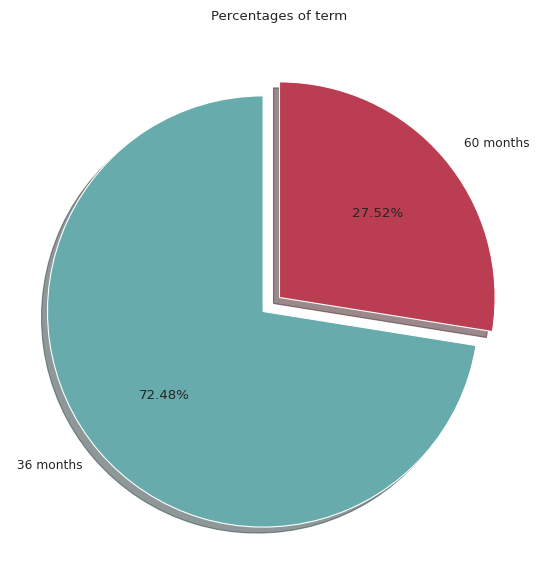

In [22]:
print("Total number of 'term':")
print('36 months:', df['term'].value_counts()[0], '=>',
      round(df['term'].value_counts(normalize=True)[0]*100, 2),'%')
print('60 months:', df['term'].value_counts()[1], '=>',
      round(df['term'].value_counts(normalize=True)[1]*100, 2),'%')

# visualize term variable with pie chart
plt.figure(figsize=(10, 7))
plt.pie(x=df['term'].value_counts(), labels=df['term'].unique(), autopct='%1.2f%%',
        startangle=90, shadow=True, explode=[0.1,0], colors = ["#68abad", "#ba3d51"])
plt.title('Percentages of term')
plt.show()

In [23]:
# create table for risk status by fitur
def table_fitur(fitur, title):
    rs_pp = df[df['risk_status'] == 'Good Risk'].groupby(fitur).size().reset_index()
    rs_pp.columns = [title, 'Total for Good Risk']
    rs_pp['Good Risk (%)'] = round(rs_pp['Total for Good Risk']*100/sum(rs_pp['Total for Good Risk']), 2)
    rs_pp_bad = df[df['risk_status'] == 'Bad Risk'].groupby(fitur).size().reset_index()
    rs_pp_bad.columns = [title, 'Total for Bad Risk']
    rs_pp['Total for Bad Risk'] = rs_pp_bad['Total for Bad Risk']
    rs_pp['Bad Risk (%)'] = round(rs_pp_bad['Total for Bad Risk']*100/sum(rs_pp_bad['Total for Bad Risk']), 2)
    print(f'Risk Status by {title}')
    rs_pp = rs_pp.sort_values(by=title, ascending=True)
    return rs_pp

# calculate ratio and pivoting
def ratio_with_target(feats):
    ratio_df = df.groupby([feats,'risk_status']).agg({'loan_amnt':'count'}).reset_index()
    ratio_df['ratio'] = ratio_df.groupby(feats).apply(lambda x: round(x.loan_amnt/x.loan_amnt.sum() *100, 0)).values.astype(int)
    ratio_df = ratio_df.pivot_table(index=feats, columns='risk_status', values='ratio')
    ratio_df = ratio_df.sort_values(by=['Good Risk'], ascending=False)
    return ratio_df

#---------------------------------------------------------------------------------------------------------

# visualization
def visualization_v(fitur, title):
    fig, ax = plt.subplots(1,2, figsize=(15,6))
    # visualize (1)
    ax[0].set_title(f'Risk Status by {title}', fontsize=14)
    ax[0] = sns.countplot(x=fitur,  hue="risk_status", data=df, palette =["#68abad", "#ba3d51"], ax=ax[0],
                          order = sorted(df[df['risk_status'] == 'Good Risk'][fitur].unique()))
    #ax[0].bar_label(ax[0].containers[0], fontsize=10)
    #ax[0].bar_label(ax[0].containers[1], fontsize=10)
    ax[0].set_ylabel('count', fontsize=9)
    ax[0].set_xlabel(title, fontsize=9)
    ax[0].legend(loc="upper right")
    # visualize (2)
    ax[1].set_title(f'Ratio of Risk Status by {title}', fontsize=14)
    ratio_with_target(fitur).plot(kind='barh', stacked=True, color = ['#ba3d51', '#68abad'], ax=ax[1])
    #for p in ax[1].patches:
    #    left, bottom, width, height = p.get_bbox().bounds
    #    if width != 0:
    #        ax[1].annotate((str(width)), xy=(left+width/2, bottom+height/2),
    #                    ha='center', va='center', fontsize=10)
    ax[1].set_xlabel('Percentage (%)', fontsize=9)
    ax[1].set_ylabel(title, fontsize=9)
    ax[1].legend(loc="upper right")
    plt.tight_layout()
    plt.show()

#---------------------------------------------------------------------------------------------------------

def visualization_h(fitur, title):
    fig, ax = plt.subplots(1,2, figsize=(15,6))
    # visualize (1)
    ax[0].set_title(f'Risk Status by {title}\n', fontsize=14)
    ax[0] = sns.countplot(y=fitur,  hue="risk_status", data=df, palette =["#68abad", "#ba3d51"], ax=ax[0],
                          order = df[fitur].value_counts().index)
    ax[0].set_ylabel('count', fontsize=9)
    ax[0].set_xlabel(title, fontsize=9)
    ax[0].legend(loc="lower right")

    # visualize (2)
    ax[1].set_title(f'Ratio of Risk Status by {title}\n', fontsize=14)
    ratio_with_target(fitur).plot(kind='barh', stacked=True, color = ['#ba3d51', '#68abad'], ax=ax[1])
    #for p in ax[1].patches:
    #    left, bottom, width, height = p.get_bbox().bounds
    #    if width != 0:
    #        ax[1].annotate((str(width)), xy=(left+width/2, bottom+height/2),
    #                    ha='center', va='center', fontsize=14)
    ax[1].set_xlabel('Percentage (%)', fontsize=9)
    ax[1].set_ylabel(title, fontsize=9)
    plt.tight_layout()
    plt.show()

#---------------------------------------------------------------------------------------------------------

def visualization(fitur, title):
    fig, ax = plt.subplots(1,2, figsize=(15,6))
    # visualize (1)
    ax[0].set_title(f'Risk Status by {title}\n', fontsize=14)
    ax[0] = sns.countplot(x=fitur,  hue="risk_status", data=df, palette =["#68abad", "#ba3d51"], ax=ax[0],
                          order = sorted(df[df['risk_status'] == 'Good Risk'][fitur].unique()))
    ax[0].set_ylabel('count', fontsize=9)
    ax[0].set_xlabel(title, fontsize=9)
    # visualize (2)
    ax[1].set_title(f'Ratio of Risk Status by {title}\n', fontsize=14)
    ratio_with_target(fitur).plot(kind='barh', stacked=True, color = ['#ba3d51', '#68abad'], ax=ax[1])
    #for p in ax[1].patches:
    #    left, bottom, width, height = p.get_bbox().bounds
    #    if width != 0:
    #        ax[1].annotate((str(width)), xy=(left+width/2, bottom+height/2),
    #                    ha='center', va='center', fontsize=8)
    ax[1].set_xlabel('Percentage (%)', fontsize=9)
    ax[1].set_ylabel(title, fontsize=9)
    plt.tight_layout()
    plt.show()

In [24]:
table_fitur("term", "Term")

Risk Status by Term


,Term,Total for Good Risk,Good Risk (%),Total for Bad Risk,Bad Risk (%)
0,36 months,304374,73.500000,33579,64.340000
1,60 months,109725,26.500000,18607,35.660000


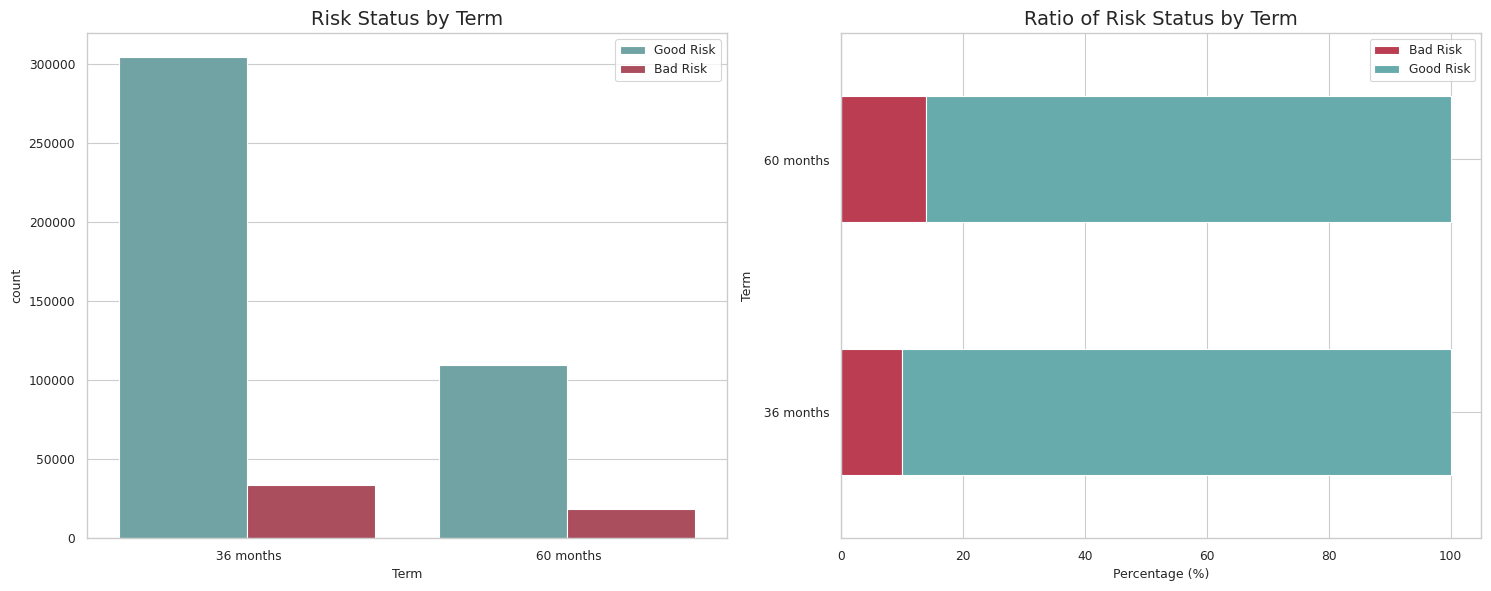

In [25]:
visualization_v('term', 'Term')

**Key Takeaways:**
1. **Loan Term Menyatakan Jumlah Pembayaran Pinjaman:**
    
    Istilah pinjaman (loan term) digunakan untuk mengindikasikan jumlah pembayaran yang harus dilakukan oleh peminjam selama periode pinjaman. Dalam kasus ini, ada dua jenis istilah pinjaman yang mungkin, yaitu 36 bulan atau 60 bulan.
2. **Mayoritas Pinjaman Memiliki Term 36 Bulan:**
    
    Mayoritas pinjaman (sebanyak 72,48%) memiliki periode pinjaman selama 36 bulan. Artinya, sebagian besar peminjam memilih untuk membayar pinjaman mereka dalam waktu tiga tahun (36 bulan).
3. **Pinjaman dengan Term 36 Bulan Lebih Cenderung Menjadi Bad Risk:**
    
    Pinjaman dengan periode pinjaman 36 bulan cenderung dua kali lebih mungkin untuk menjadi "Bad Risk" daripada pinjaman dengan periode pinjaman 60 bulan. Hal ini berarti bahwa risiko buruk (Bad Risk) lebih mungkin terjadi pada pinjaman dengan periode pendek (36 bulan) dibandingkan dengan pinjaman jangka panjang (60 bulan).

Dalam konteks pernyataan ini, pengamatan ini mengindikasikan bahwa ada hubungan antara `term` dan `risk_status`. Kemungkinan besar, pinjaman dengan periode pendek (36 bulan) mungkin memiliki pembayaran bulanan yang lebih tinggi, namun peminjam mungkin memiliki kesulitan dalam memenuhi kewajiban pembayaran mereka, yang menjadikan mereka lebih rentan terhadap risiko kredit yang buruk. Ini adalah informasi yang berguna untuk pemahaman tentang perilaku pinjaman dalam dataset tersebut.

##### 2. Bivariate: Risk Status by Grade

In [26]:
df["grade"].value_counts().sort_index()

A     74867
B    136929
C    125293
D     76888
E     35757
F     13229
G      3322
Name: grade, dtype: int64

Text(0.5, 0, 'Grade')

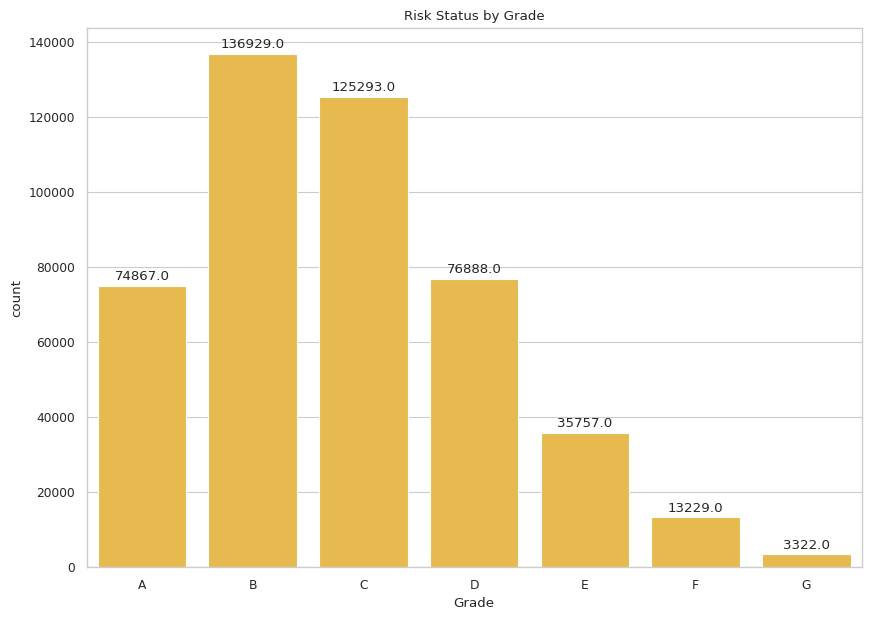

In [27]:
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')
ax = sns.countplot(x='grade', data=df, color='#FFC436',
                   order=sorted(df['grade'].unique()))
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points')
plt.title('Risk Status by Grade')
plt.xlabel('Grade')

In [28]:
table_fitur("grade", "Grade")

Risk Status by Grade


,Grade,Total for Good Risk,Good Risk (%),Total for Bad Risk,Bad Risk (%)
0,A,71912,17.370000,2955,5.660000
1,B,125921,30.410000,11008,21.090000
2,C,110550,26.700000,14743,28.250000
3,D,64756,15.640000,12132,23.250000
4,E,28618,6.910000,7139,13.680000
5,F,9962,2.410000,3267,6.260000
6,G,2380,0.570000,942,1.810000


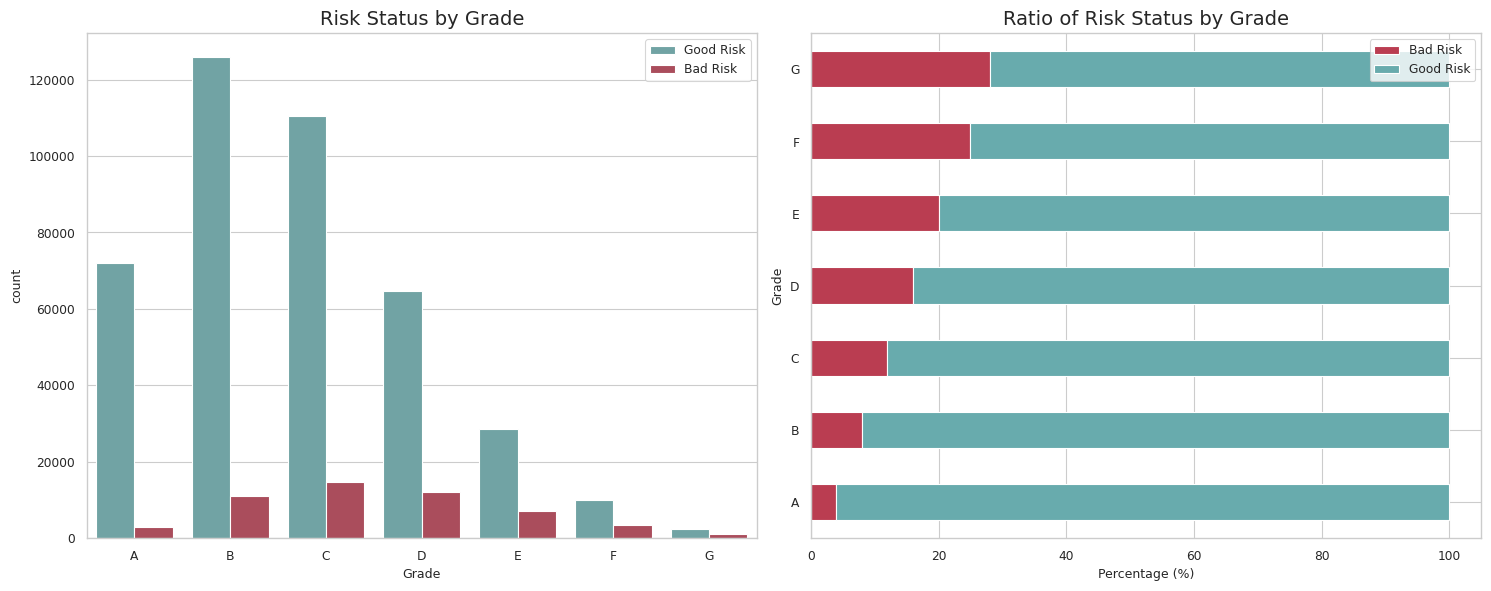

In [29]:
visualization_v('grade', 'Grade')

**Key Takeaways:**
1. **Grade Menyatakan Nilai Pinjaman yang Diberikan oleh Lending Company:**
    
    Terdapat 7 tingkatan atau peringkat nilai yang berbeda dari A hingga G yang digunakan untuk menggambarkan kualitas atau risiko pinjaman.
    
2. **Sebagian besar pinjaman diberi peringkat B (sekitar 29.3% dari total pinjaman):**

     Ini menunjukkan bahwa peringkat B adalah yang paling umum atau paling banyak digunakan dalam klasifikasi pinjaman.

3. **Lebih dari 72% dari Total Pinjaman yang "Good Risk" memiliki Nilai C atau Nilai yang Lebih Tinggi, sedangkan Kurang dari 1% dari Total Pinjaman yang "Good Risk" Diberi Nilai G:**
    
    Ini mengindikasikan bahwa sebagian besar pinjaman memiliki risiko sedang hingga rendah dan ini juga menunjukkan bahwa hanya sejumlah kecil pinjaman yang memiliki risiko sangat tinggi.

Dengan informasi ini, dapat disimpulkan bahwa sebagian besar pinjaman memiliki risiko yang cukup rendah atau sedang, dan hanya sejumlah kecil pinjaman yang memiliki risiko tinggi. Penilaian Grade ini membantu perusahaan peminjam dalam mengelola risiko dan menentukan suku bunga serta persyaratan pemberian pinjaman kepada peminjam.

##### 3. Bivariate: Risk Status by Sub Grade

In [30]:
table_fitur("sub_grade", "Sub Grade")

Risk Status by Sub Grade


,Sub Grade,Total for Good Risk,Good Risk (%),Total for Bad Risk,Bad Risk (%)
0,A1,10332,2.500000,209,0.400000
1,A2,10636,2.570000,320,0.610000
2,A3,12121,2.930000,447,0.860000
3,A4,18191,4.390000,854,1.640000
4,A5,20632,4.980000,1125,2.160000
5,B1,21488,5.190000,1388,2.660000
6,B2,24736,5.970000,1874,3.590000
7,B3,29125,7.030000,2561,4.910000
8,B4,27782,6.710000,2723,5.220000
9,B5,22790,5.500000,2462,4.720000


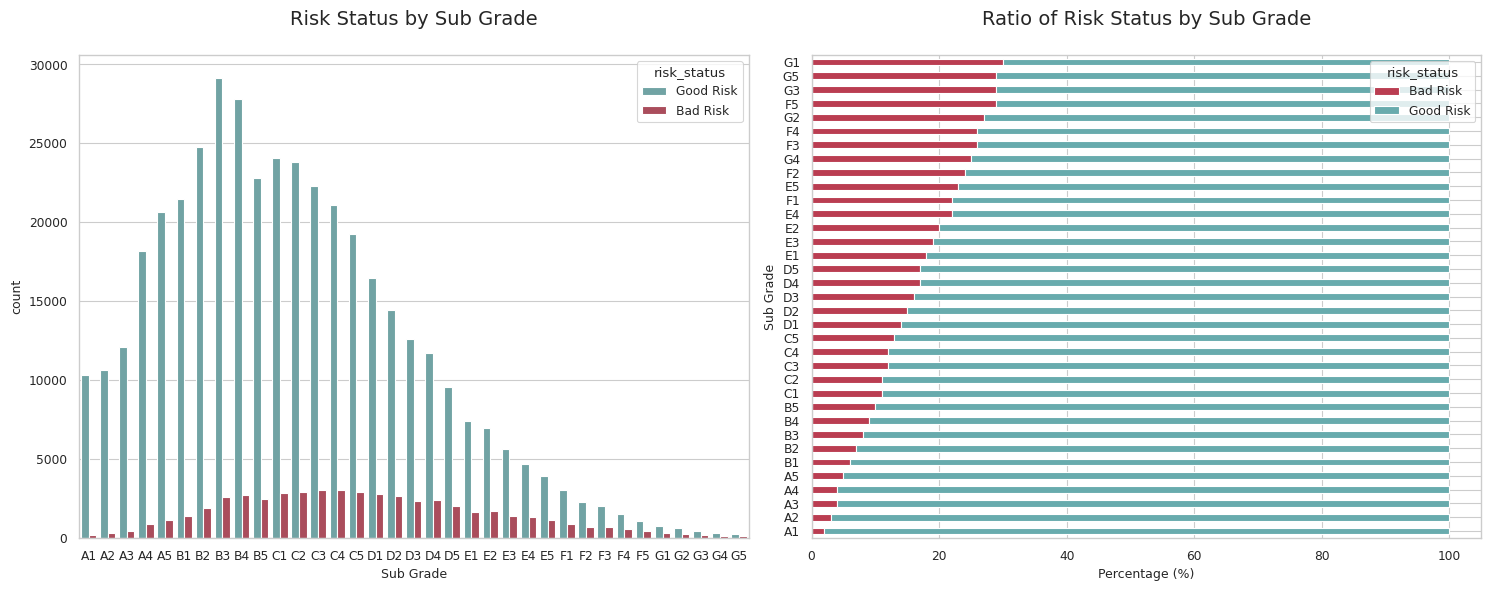

In [31]:
visualization("sub_grade", "Sub Grade")

##### 4. Bivariate: Risk Status by Verification Status

In [32]:
unique_loan_status = df["verification_status"].unique()
print(unique_loan_status)

['Verified' 'Source Verified' 'Not Verified']


Total number of 'Verification Status':
Verified       : 168055 => 36.04 %
Source Verified: 149993 => 32.17 %
Not Verified   : 148237 => 31.79 %


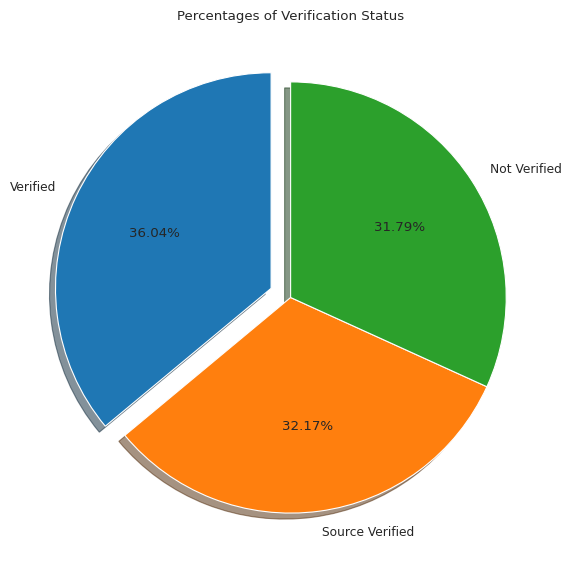

In [33]:
print("Total number of 'Verification Status':")
print('Verified       :', df['verification_status'].value_counts()[0], '=>',
      round(df['verification_status'].value_counts(normalize=True)[0]*100, 2),'%')
print('Source Verified:', df['verification_status'].value_counts()[1], '=>',
      round(df['verification_status'].value_counts(normalize=True)[1]*100, 2),'%')
print('Not Verified   :', df['verification_status'].value_counts()[2], '=>',
      round(df['verification_status'].value_counts(normalize=True)[2]*100, 2),'%')

# visualize term variable with pie chart
plt.figure(figsize=(10, 7))
plt.pie(x=df['verification_status'].value_counts(), labels=df['verification_status'].unique(), autopct='%1.2f%%',
        startangle=90, shadow=True, explode=[0.1,0,0])
plt.title('Percentages of Verification Status')
plt.show()

In [34]:
table_fitur("verification_status", "Verification Status")

Risk Status by Verification Status


,Verification Status,Total for Good Risk,Good Risk (%),Total for Bad Risk,Bad Risk (%)
0,Not Verified,134032,32.370000,14205,27.220000
1,Source Verified,133903,32.340000,16090,30.830000
2,Verified,146164,35.300000,21891,41.950000


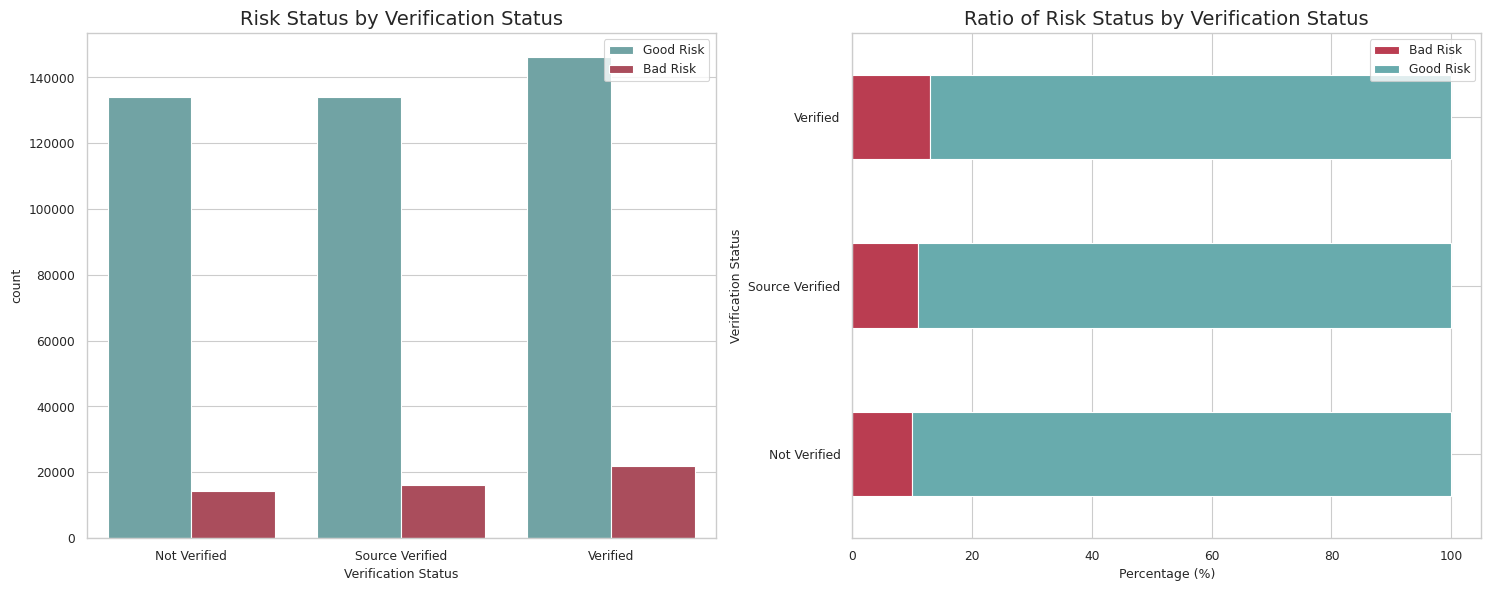

In [35]:
visualization_v('verification_status', 'Verification Status')

**Key Takeaways:**
1. **"Verification Status" Mengacu pada Status Verifikasi Pendapatan Peminjam:**
    
    Ada tiga kemungkinan status: terverifikasi oleh perusahaan, belum diverifikasi, dan verifikasi sumber pendapatan.

2. **Sebanyak 36% dari Total Pendapatan telah Diverifikasi oleh Perusahaan:**

    Ini berarti bahwa lebih dari sepertiga dari peminjam memiliki pendapatan yang telah diperiksa oleh perusahaan peminjam untuk memastikan kebenaran dan kestabilan pendapatannya.

3. **Sebanyak 31% dari Total Pendapatan Belum Diverifikasi:**

    Ini mengindikasikan bahwa sebagian besar peminjam memiliki pendapatan yang belum diperiksa oleh perusahaan peminjam atau belum memenuhi syarat untuk diverifikasi.

Dengan informasi ini, dapat disimpulkan bahwa ada sebagian besar peminjam yang telah menjalani proses verifikasi pendapatan oleh perusahaan peminjam, tetapi ada juga sebagian yang belum melalui proses verifikasi ini. Verifikasi pendapatan adalah langkah penting dalam menentukan kelayakan peminjam untuk mendapatkan pinjaman dan menilai risiko pembayaran kembali.

##### 5. Bivariate: Risk Status by Payment Plan

In [36]:
table_fitur("pymnt_plan", "Payment Plan")

Risk Status by Payment Plan


,Payment Plan,Total for Good Risk,Good Risk (%),Total for Bad Risk,Bad Risk (%)
0,n,414095,100.000000,52181,99.990000
1,y,4,0.000000,5,0.010000


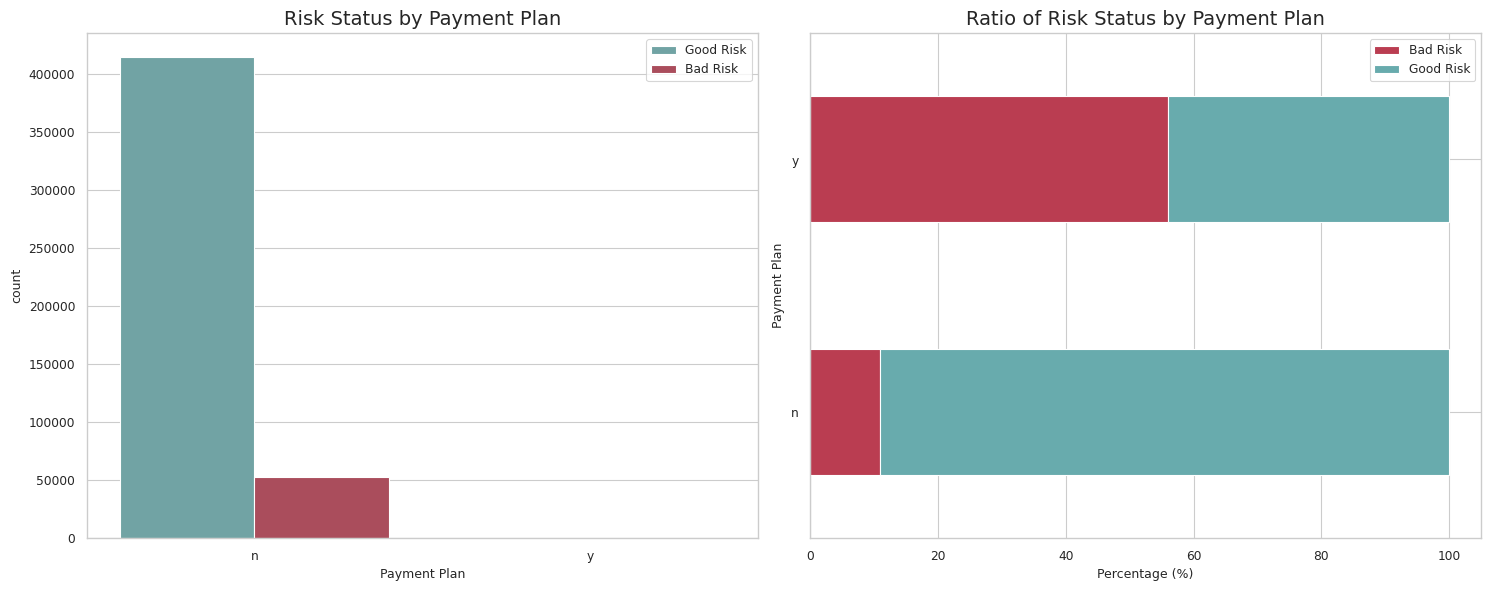

In [37]:
visualization_v("pymnt_plan", 'Payment Plan')

**Key Takeaways:**
1. "Payment plan" mengacu pada keberadaan atau ketiadaan rencana pembayaran yang telah disusun oleh peminjam untuk mengatur cara mereka akan membayar pinjaman mereka.

2. **Sebanyak 99% dari total peminjam tidak menyiapkan rencana pembayaran untuk pinjaman mereka**
    
    Ini berarti bahwa sebagian besar peminjam tidak memiliki rencana pembayaran yang jelas atau terstruktur untuk membayar pinjaman mereka. Mereka mungkin mengandalkan metode pembayaran yang fleksibel atau tidak memiliki rencana khusus.

3. **Hanya 9 dari total peminjam (kurang dari 1%) yang telah menyiapkan rencana pembayaran untuk pinjaman mereka**

    Ini menunjukkan bahwa hanya sejumlah kecil peminjam yang telah mempersiapkan rencana khusus untuk membayar pinjaman mereka.

Arti dari informasi ini adalah bahwa sebagian besar peminjam tidak memiliki rencana pembayaran khusus untuk pinjaman mereka, sementara hanya sejumlah kecil yang melakukannya. Hal ini dapat memberikan wawasan tentang pola perilaku pembayaran peminjam dan sejauh mana mereka memiliki rencana keuangan yang terstruktur untuk mengelola pinjaman mereka.

##### 6. Bivariate: Risk Status by Initial List Status

Total number of 'Initial List Status':
Whole Loan     : 303005 => 64.98 %
Fractional Loan: 163280 => 35.02 %


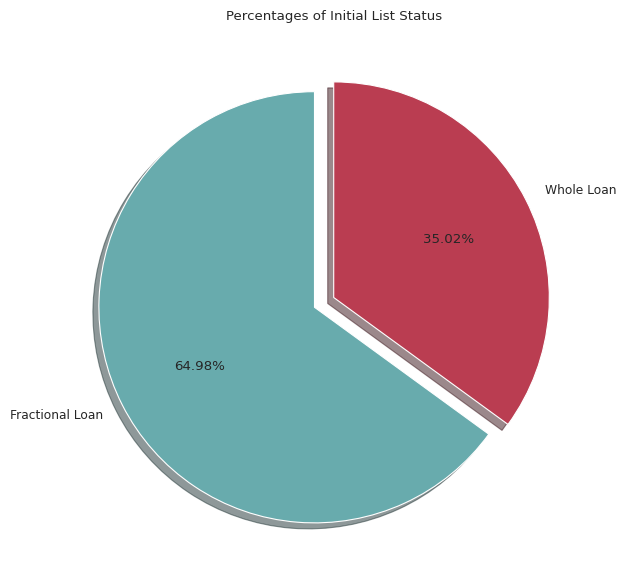

In [38]:
# replace
df['initial_list_status'] = df['initial_list_status'].replace(['w','f'],['Whole Loan','Fractional Loan'])

print("Total number of 'Initial List Status':")
print('Whole Loan     :', df['initial_list_status'].value_counts()[0], '=>',
      round(df['initial_list_status'].value_counts(normalize=True)[0]*100, 2),'%')
print('Fractional Loan:', df['initial_list_status'].value_counts()[1], '=>',
      round(df['initial_list_status'].value_counts(normalize=True)[1]*100, 2),'%')

# visualize term variable with pie chart
plt.figure(figsize=(10, 7))
plt.pie(x=df['initial_list_status'].value_counts(), labels=df['initial_list_status'].unique(), autopct='%1.2f%%', colors = ["#68abad", "#ba3d51"],
        startangle=90, shadow=True, explode=[0.1,0])
plt.title('Percentages of Initial List Status')
plt.show()

In [39]:
table_fitur("initial_list_status", 'Initial List Status')

Risk Status by Initial List Status


,Initial List Status,Total for Good Risk,Good Risk (%),Total for Bad Risk,Bad Risk (%)
0,Fractional Loan,265883,64.210000,37122,71.130000
1,Whole Loan,148216,35.790000,15064,28.870000


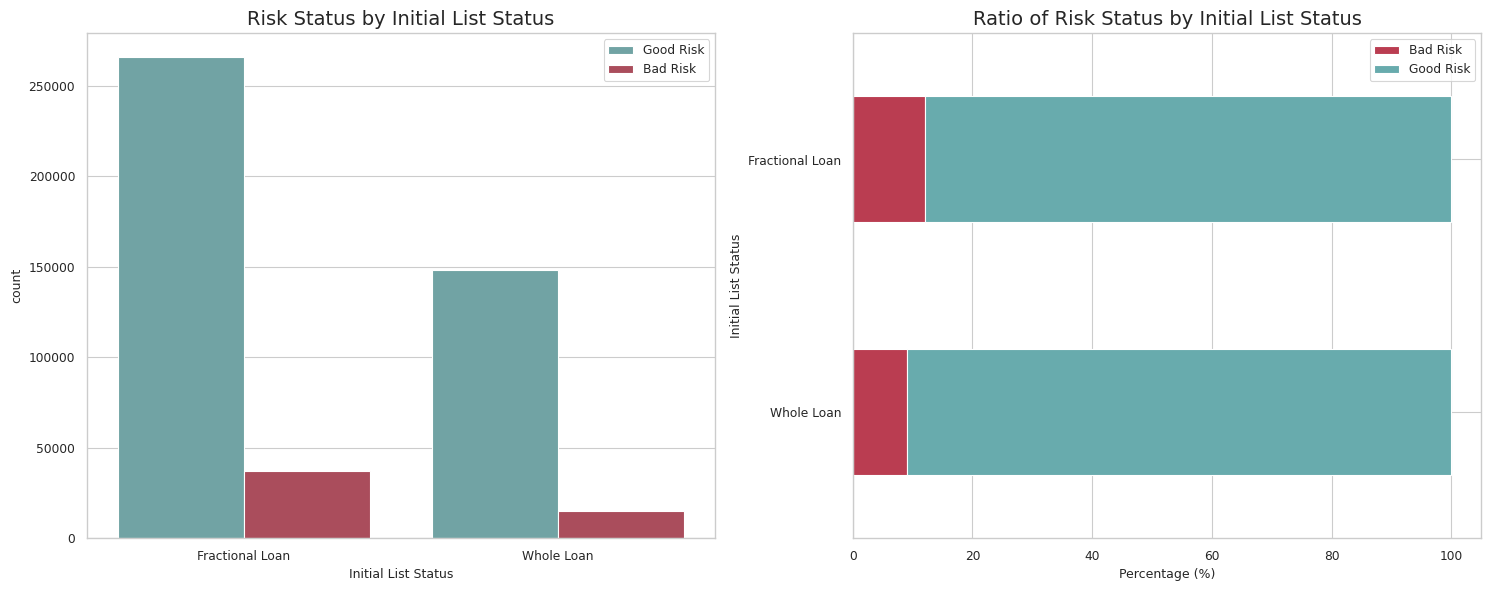

In [40]:
visualization_v("initial_list_status", 'Initial List Status')

**Key Takeaways:**
1. **Initial List Status adalah atribut yang memberikan informasi tentang status awal dari penempatan atau pendaftaran pinjaman**

    Dengan kata lain, ini menggambarkan apakah pinjaman tersebut awalnya ditawarkan sebagai keseluruhan (whole loan) atau sebagai pinjaman fraksional (fractional loan).

2. **Terdapat dua jenis status awal penempatan yang mungkin, yaitu "W (Whole loan)" dan "F (Fractional loan)"**
    
    Ini berarti bahwa setiap pinjaman awalnya akan dicirikan sebagai salah satu dari dua jenis ini berdasarkan apakah kreditur atau pemberi pinjaman memberikan pinjaman secara keseluruhan atau membaginya kepada beberapa pemberi pinjaman.

3. **Mayoritas dari pinjaman memiliki status awal penempatan sebagai "Fractional loan" (pinjaman fraksional), yaitu sekitar 64%**
    
    Ini menunjukkan bahwa sebagian besar pinjaman awalnya didistribusikan atau didanai oleh beberapa pemberi pinjaman atau dalam bentuk pinjaman fraksional, dan tidak diberikan sebagai pinjaman keseluruhan oleh satu pemberi pinjaman tunggal.

Arti dari informasi ini adalah bahwa "Initial list status" dapat memberikan wawasan tentang bagaimana struktur pembiayaan pinjaman awalnya disusun, apakah sebagai pinjaman keseluruhan atau pinjaman fraksional yang melibatkan lebih dari satu pemberi pinjaman. Informasi ini penting dalam pemahaman tentang cara dana pinjaman diperoleh dan dikelola dalam proses pemberian pinjaman.

##### 7. Bivariate: Risk Status by Purpose

In [41]:
table_fitur("purpose", "Purpose")

Risk Status by Purpose


,Purpose,Total for Good Risk,Good Risk (%),Total for Bad Risk,Bad Risk (%)
0,car,4909,1.190000,488,0.940000
1,credit_card,94957,22.930000,9200,17.630000
2,debt_consolidation,242359,58.530000,31836,61.000000
3,educational,334,0.080000,88,0.170000
4,home_improvement,23865,5.760000,2672,5.120000
5,house,1947,0.470000,322,0.620000
6,major_purchase,8866,2.140000,962,1.840000
7,medical,3978,0.960000,624,1.200000
8,moving,2529,0.610000,465,0.890000
9,other,20351,4.910000,3339,6.400000


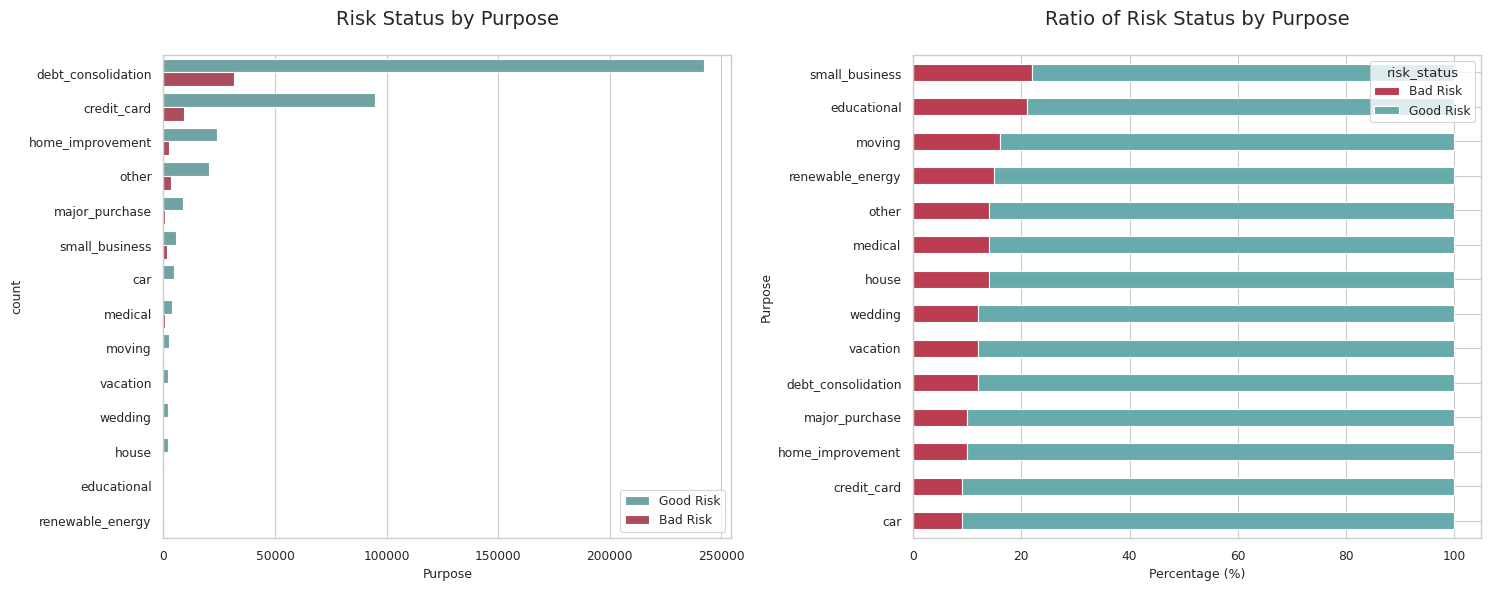

In [42]:
visualization_h("purpose", "Purpose")

**Key Takeaways:**
1. **Purpose  menggambarkan tujuan atau alasan yang diajukan oleh pemohon pinjaman ketika mengajukan permohonan pinjaman**
    
    Terdapat total 13 kategori atau tujuan yang berbeda.

2. **Lebih dari setengah (58%) dari total pinjaman yang disetujui digunakan untuk tujuan konsolidasi utang (debt consolidation)**

    Maksudnya adalah sebagian besar peminjam menggunakan pinjaman ini untuk menggabungkan atau mengatasi utang-utang mereka. Selain konsolidasi utang, kategori-kategori lain yang signifikan meliputi penggunaan pinjaman untuk kartu kredit (credit card) dan perbaikan rumah (home improvement).

3. Hanya 0.1% dari pinjaman yang diajukan untuk tujuan energi terbarukan (renewable energy) memiliki "Bad Risk", sementara 61% dari pinjaman konsolidasi utang (debt consolidation) memiliki "Bad Risk".

Arti dari informasi ini adalah bahwa "Purpose" dapat memberikan wawasan tentang tujuan pemohon pinjaman ketika mengajukan pinjaman. Ini juga menggambarkan perbedaan dalam tingkat risiko yang terkait dengan berbagai tujuan pinjaman. Misalnya, tujuan konsolidasi utang (debt consolidation) cenderung memiliki risiko yang lebih tinggi daripada tujuan lainnya. Informasi ini dapat digunakan untuk analisis risiko kredit dan pengambilan keputusan terkait pemberian pinjaman.

##### 8. Bivariate: Risk Status by Home Ownership

In [43]:
df["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

Pada "home_ownership" (pemilikan rumah), terdapat dua label, yaitu "ANY" dan "NONE" yang dapat digabungkan dengan label "OTHER". Penggabungan label-label ini dapat membantu menyederhanakan analisis atau meningkatkan interpretasi data, terutama jika jumlah observasi dengan label "ANY" atau "NONE" terbatas dan tidak memberikan informasi yang cukup berarti secara terpisah.

In [44]:
# reduce the number of categories of home ownership
def func(row):
    if row['home_ownership'] == 'MORTGAGE':
        val = 'MORTGAGE'
    elif (row['home_ownership'] == 'RENT'):
        val ='RENT'
    elif (row['home_ownership'] == 'OWN'):
        val ='OWN'
    else:
        val ='OTHERS'
    return val

df['home_ownership'] = df.apply(func, axis=1)

Total number of 'Home Ownership':
MORTGAGE: 235875 => 50.59 %
OTHERS  : 188473 => 40.42 %
OWN     : 41704 => 8.94 %
RENT    : 233 => 0.05 %


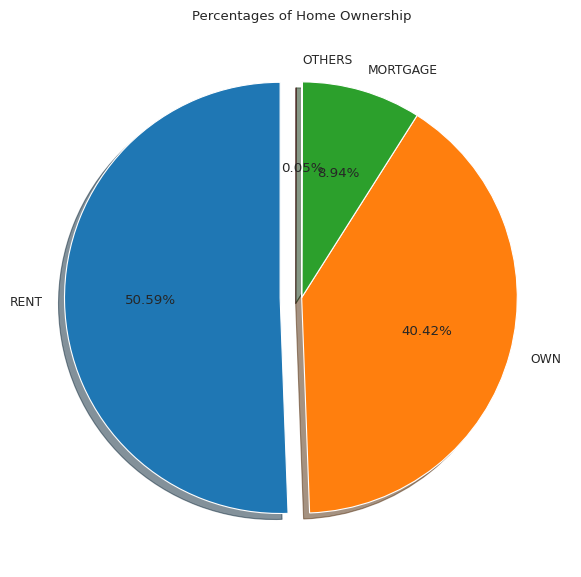

In [45]:
print("Total number of 'Home Ownership':")
print('MORTGAGE:', df['home_ownership'].value_counts()[0], '=>',
      round(df['home_ownership'].value_counts(normalize=True)[0]*100, 2),'%')
print('OTHERS  :', df['home_ownership'].value_counts()[1], '=>',
      round(df['home_ownership'].value_counts(normalize=True)[1]*100, 2),'%')
print('OWN     :', df['home_ownership'].value_counts()[2], '=>',
      round(df['home_ownership'].value_counts(normalize=True)[2]*100, 2),'%')
print('RENT    :', df['home_ownership'].value_counts()[3], '=>',
      round(df['home_ownership'].value_counts(normalize=True)[3]*100, 2),'%')

# visualize term variable with pie chart
plt.figure(figsize=(10, 7))
plt.pie(x=df['home_ownership'].value_counts(), labels=df['home_ownership'].unique(), autopct='%1.2f%%',
        startangle=90, shadow=True, explode=[0.1,0,0,0])
plt.title('Percentages of Home Ownership')
plt.show()

In [46]:
table_fitur("home_ownership", "Home Ownership")

Risk Status by Home Ownership


,Home Ownership,Total for Good Risk,Good Risk (%),Total for Bad Risk,Bad Risk (%)
0,MORTGAGE,212628,51.350000,23247,44.550000
1,OTHERS,187,0.050000,46,0.090000
2,OWN,37061,8.950000,4643,8.900000
3,RENT,164223,39.660000,24250,46.470000


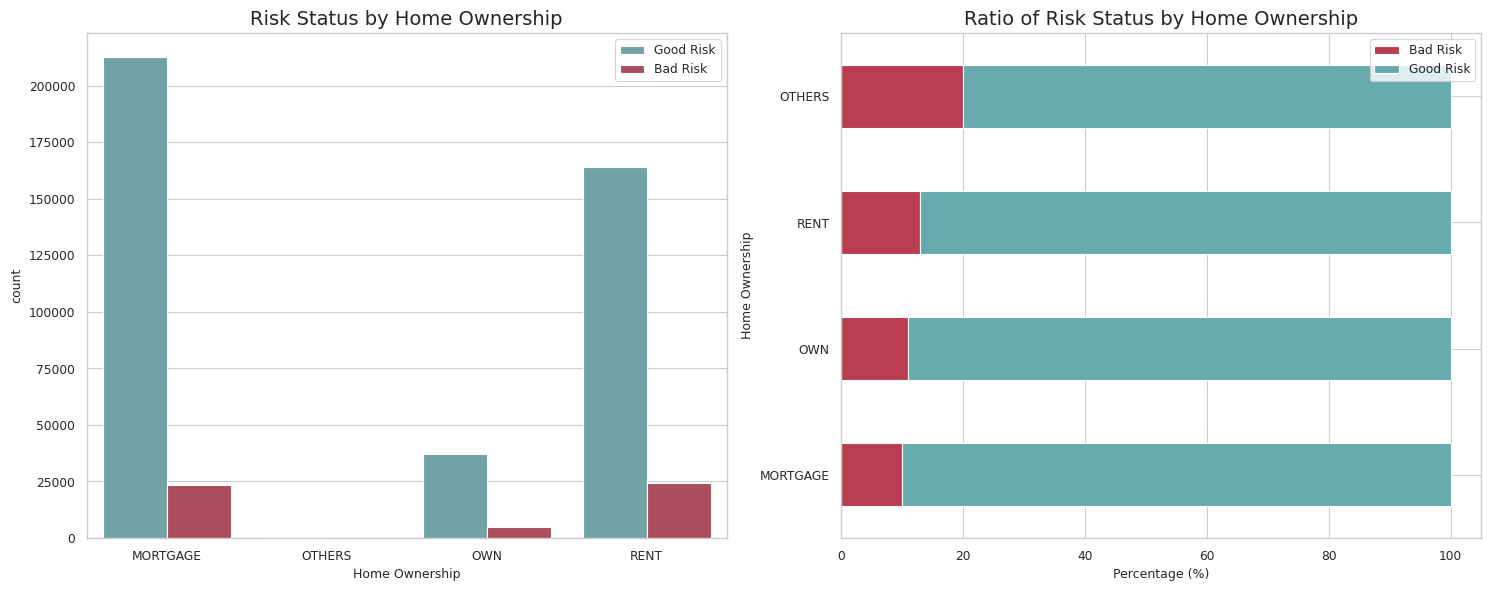

In [47]:
visualization_v("home_ownership", "Home Ownership")

**Key Takeaways:**

1. "Home Ownership" menggambarkan status kepemilikan rumah yang diinformasikan oleh pemohon selama proses registrasi untuk pinjaman.

2. **Mayoritas Peminjam Memiliki KPR atau Menyewa Rumah**
    
    Lebih dari separuh dari pemohon pinjaman (50%) memiliki hipotek yang ada (existing mortgage), yang berarti mereka sudah memiliki hipotek rumah. Selain itu, 40% dari pemohon saat ini menyewa rumah. Artinya, mayoritas pemohon memiliki rumah yang sedang dihipotek atau sedang disewa.

3. **Peminjam dengan KPR atau yang Menyewa Rumah Lebih Berisiko**

    Maksudnya adalah pemohon yang memiliki KPR atau yang sedang menyewa rumah memiliki probabilitas "Bad Risk" yang lebih tinggi. Ini mengindikasikan bahwa pemohon dengan status kepemilikan rumah ini memiliki risiko kredit yang lebih tinggi, mungkin karena kewajiban finansial yang lebih besar terkait dengan kepemilikan rumah atau sewa rumah. Pernyataan ini dapat mengarah pada temuan bahwa tipe kepemilikan rumah ini memiliki dampak signifikan pada penilaian risiko kredit.

Arti dari informasi ini adalah bahwa "home ownership" dapat digunakan untuk memahami hubungan antara status kepemilikan rumah pemohon dan risiko kredit. Pernyataan tersebut menggambarkan distribusi pemohon berdasarkan tipe kepemilikan rumah dan mengungkapkan bahwa pemohon dengan hipotek atau penyewaan rumah cenderung memiliki risiko kredit yang lebih tinggi. Hal ini dapat bermanfaat dalam analisis risiko kredit dan pengambilan keputusan pemberian pinjaman.

##### 8. Bivariate: Risk Status by Employment Length

In [48]:
table_fitur("emp_length", "Employement Length")

Risk Status by Employement Length


,Employement Length,Total for Good Risk,Good Risk (%),Total for Bad Risk,Bad Risk (%)
0,1 year,26236,6.340000,3386,6.490000
1,10+ years,152877,36.920000,18180,34.840000
2,2 years,36726,8.870000,4647,8.900000
3,3 years,32488,7.850000,4108,7.870000
4,4 years,24872,6.010000,3151,6.040000
5,5 years,27163,6.560000,3611,6.920000
6,6 years,22996,5.550000,3116,5.970000
7,7 years,23201,5.600000,2979,5.710000
8,8 years,19880,4.800000,2515,4.820000
9,9 years,15822,3.820000,2066,3.960000


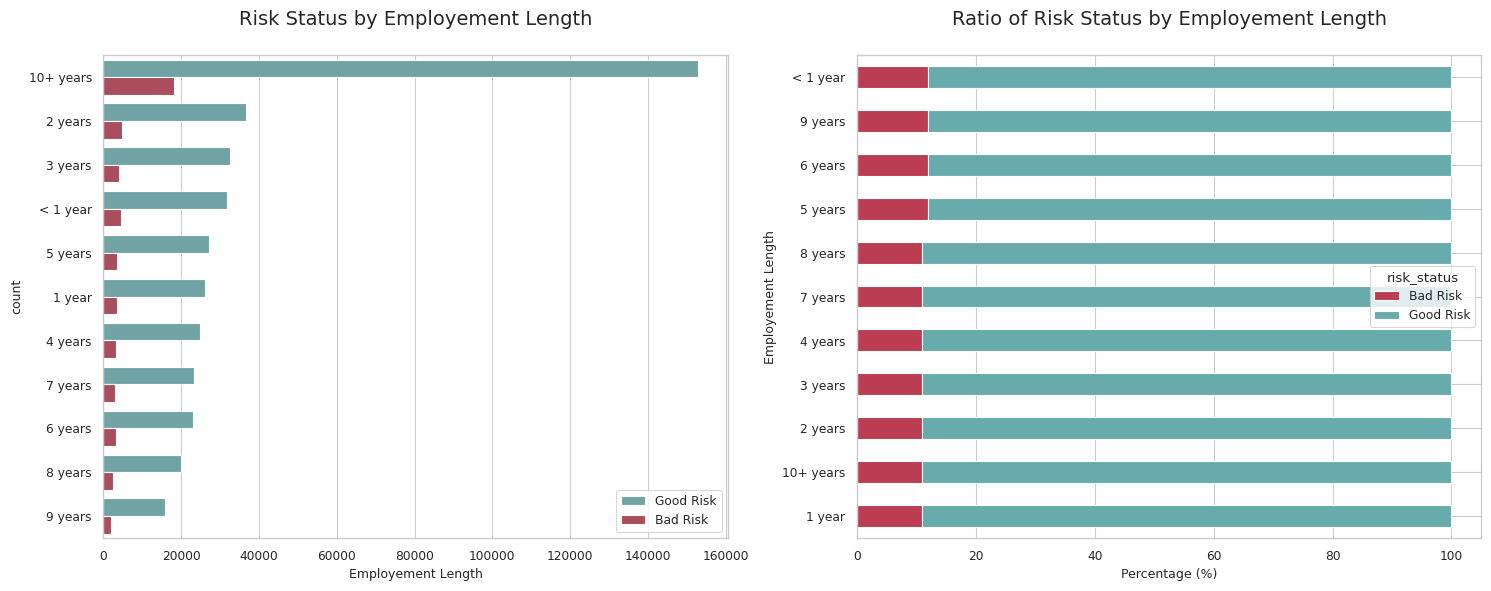

In [49]:
visualization_h("emp_length", "Employement Length")

**Key Takeaways:**
1. **"employment length" memiliki 11 tingkatan yang menggambarkan berapa lama pemohon telah bekerja**

    Tingkatan tersebut berkisar dari kurang dari 1 tahun hingga 10+ tahun, mencakup berbagai lama pengalaman kerja.

2. **Terdapat dua kelompok besar dalam atribut lamanya bekerja**
    Yang pertama adalah pemohon yang memiliki pengalaman kerja selama 10 tahun atau lebih (10+ years), yang merupakan kelompok paling umum dengan persentase 33.7%. Yang kedua adalah pemohon yang memiliki pengalaman kerja kurang dari 3 tahun (< 3 years), yang juga merupakan kelompok yang signifikan dengan persentase 32.3%.

Arti dari informasi ini adalah bahwa atribut "employment length" memberikan gambaran tentang lama pengalaman kerja pemohon pinjaman. Dua kelompok besar ini, yaitu yang memiliki pengalaman kerja lama (10+ years) dan yang memiliki pengalaman kerja pendek (< 3 years). Pemahaman tentang lama bekerja pemohon dapat menjadi faktor penting dalam menilai kelayakan mereka untuk memperoleh pinjaman, karena pengalaman kerja sering kali terkait dengan stabilitas finansial dan kemampuan untuk membayar kembali pinjaman.

##### 3.2.3 Bivariate Analysis: Numerical Features

In [50]:
def plot_var(fitur, title):
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)

    # plot without risk status
    sns.distplot(df.loc[df[fitur].notnull(), fitur], color='#1d468a', ax=ax1)
    ax1.set_xlabel(title)
    ax1.set_ylabel('Count')
    ax1.set_title(title)

    # plot with risk status
    sns.boxplot(x=fitur, y='risk_status', data=df, ax=ax2, palette =["#68abad", "#ba3d51"])
    ax2.set_ylabel('')
    ax2.set_title(title + ' by Risk Status')
    ax2.set_xlabel(title)

    plt.tight_layout()

##### 1. Bivariate: Risk Status by Loan Amount

In [51]:
df["loan_amnt"].describe()

count   466285.000000
mean     14317.277577
std       8286.509164
min        500.000000
25%       8000.000000
50%      12000.000000
75%      20000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [52]:
df.groupby("risk_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
risk_status,,,,,,,,
Bad Risk,52186.000000,14624.953053,8390.633508,500.000000,8000.000000,12800.000000,20000.000000,35000.000000
Good Risk,414099.000000,14278.503389,8272.492476,500.000000,8000.000000,12000.000000,20000.000000,35000.000000


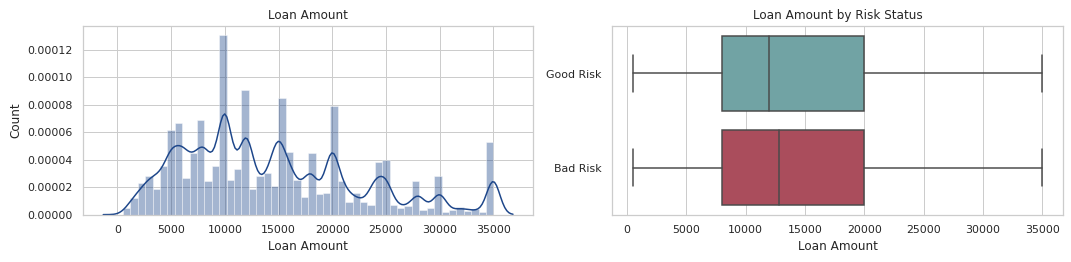

In [53]:
plot_var('loan_amnt', 'Loan Amount')

**Key Takeaways:**
1. Rentang jumlah pinjaman berkisar dari $500 hingga $35,000, dengan median (nilai tengah) sebesar $12,000.
2. Median dari pemohon dengan "Bad Risk" sedikit lebih tinggi daripada median dari pemohon dengan "Good Risk".

Dengan demikian, kesimpulan yang dapat diambil adalah bahwa secara rata-rata, pemohon dengan "Bad Risk" cenderung mendapatkan pinjaman dengan jumlah yang lebih tinggi dibandingkan dengan pemohon yang memiliki "Good Risk". Ini didasarkan pada perbandingan median yang lebih tinggi untuk pemohon dengan risiko kredit buruk, meskipun rentang jumlah pinjaman adalah sama.

##### 2. Bivariate: Risk Status by Last Payment Amount

In [54]:
df["last_pymnt_amnt"].describe()

count   466285.000000
mean      3123.913796
std       5554.737393
min          0.000000
25%        312.620000
50%        545.960000
75%       3187.510000
max      36234.440000
Name: last_pymnt_amnt, dtype: float64

In [55]:
df.groupby("risk_status")["last_pymnt_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
risk_status,,,,,,,,
Bad Risk,52186.000000,461.319145,617.624970,0.000000,245.792500,381.500000,575.120000,34833.350000
Good Risk,414099.000000,3459.461973,5804.263471,0.000000,323.380000,588.080000,4272.305000,36234.440000


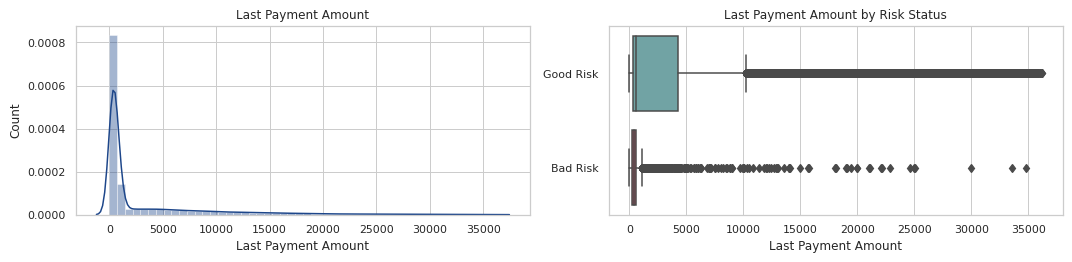

In [56]:
plot_var("last_pymnt_amnt", "Last Payment Amount")

**Key Takeaways:**
1. Rentang jumlah pembayaran terakhir (last payment amount) berkisar antara $0 hingga $36,234, dengan median (nilai tengah) sebesar $545.96.
2. Pinjaman dengan "Bad Risk" cenderung memiliki jumlah pembayaran terakhir yang lebih rendah. Ini mengindikasikan bahwa pemohon dengan jumlah pembayaran terakhir yang rendah kemungkinan besar tidak akan dapat melunasi pinjaman mereka.

Dengan kata lain, data menunjukkan bahwa pada umumnya, individu yang mendapatkan pinjaman dengan "Bad Risk" cenderung memiliki jumlah pembayaran terakhir yang lebih rendah, dan hal ini mungkin menunjukkan bahwa mereka menghadapi kesulitan dalam membayar kembali pinjaman mereka. Ini adalah tafsiran dari pernyataan yang disediakan.

##### 3. Bivariate: Risk Status by Recoveries

In [57]:
df["recoveries"].describe()

count   466285.000000
mean        85.344211
std        552.216084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      33520.270000
Name: recoveries, dtype: float64

In [58]:
df.groupby("risk_status")["recoveries"].describe()

,count,mean,std,min,25%,50%,75%,max
risk_status,,,,,,,,
Bad Risk,52186.000000,762.555581,1486.036802,0.000000,0.000000,0.000000,999.762500,33520.270000
Good Risk,414099.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


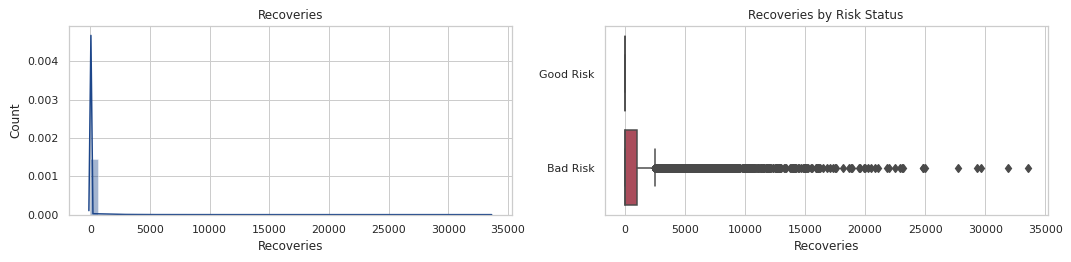

In [59]:
plot_var("recoveries", "Recoveries")

**Key Takeaways:**
1. Rentang jumlah pemulihan (recoveries) berkisar dari $0 hingga $33,520, dengan median (nilai tengah) sebesar $0.
2. Pinjaman dengan "Bad Risk" cenderung memiliki nilai pemulihan yang lebih besar daripada 0. Ini mengindikasikan bahwa pemohon dengan nilai pemulihan yang lebih besar daripada 0 memiliki tingkat peluang yang tinggi untuk tidak dapat melunasi pinjaman mereka. Sementara itu, pemohon yang kemungkinan besar dapat melunasi pinjaman mereka memiliki nilai pemulihan sebesar 0.

Dengan kata lain, data menunjukkan bahwa individu dengan "Bad Risk" seringkali memiliki nilai pemulihan yang lebih besar daripada 0, yang mungkin menandakan bahwa mereka menghadapi kesulitan dalam membayar kembali pinjaman mereka. Di sisi lain, individu yang kemungkinan besar dapat melunasi pinjaman mereka memiliki nilai pemulihan sebesar 0, yang mungkin mengindikasikan bahwa mereka dapat memenuhi kewajiban pembayaran mereka tanpa memerlukan pemulihan tambahan.

##### 4. Bivariate: Risk Status by Collection Recovery Fee

In [60]:
df["collection_recovery_fee"].describe()

count   466285.000000
mean         8.961534
std         85.491437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64

In [61]:
df.groupby("risk_status")["collection_recovery_fee"].describe()

,count,mean,std,min,25%,50%,75%,max
risk_status,,,,,,,,
Bad Risk,52186.000000,80.071836,244.154672,0.000000,0.000000,0.000000,18.000000,7002.190000
Good Risk,414099.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


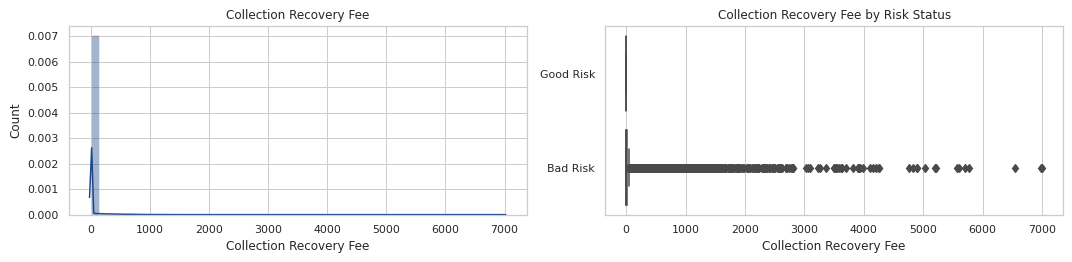

In [62]:
plot_var("collection_recovery_fee", "Collection Recovery Fee")

**Key Takeaways:**
1. Rentang biaya pemulihan koleksi (collection recovery fee) berkisar dari `$0`
hingga `$7,002`, dengan median (nilai tengah) sebesar $0.
2. Pinjaman dengan "Bad Risk" cenderung memiliki biaya pemulihan koleksi yang lebih besar daripada 0. Ini mengindikasikan bahwa pemohon dengan biaya pemulihan koleksi yang lebih besar daripada 0 memiliki tingkat peluang yang tinggi untuk tidak dapat melunasi pinjaman mereka. Sementara itu, pemohon yang kemungkinan besar dapat melunasi pinjaman mereka memiliki biaya pemulihan koleksi sebesar 0.

Dengan kata lain, data menunjukkan bahwa individu dengan "Bad Risk" seringkali memiliki biaya pemulihan koleksi yang lebih besar daripada 0, yang mungkin menandakan bahwa mereka menghadapi kesulitan dalam membayar kembali pinjaman mereka dan akhirnya memerlukan tindakan koleksi. Di sisi lain, individu yang kemungkinan besar dapat melunasi pinjaman mereka memiliki biaya pemulihan koleksi sebesar 0, yang mungkin mengindikasikan bahwa mereka dapat memenuhi kewajiban pembayaran mereka tanpa memerlukan tindakan koleksi tambahan.






##### 5. Bivariate: Risk Status by Total Principle Received

In [63]:
df["total_rec_prncp"].describe()

count   466285.000000
mean      8866.014657
std       7031.687997
min          0.000000
25%       3708.560000
50%       6817.760000
75%      12000.000000
max      35000.030000
Name: total_rec_prncp, dtype: float64

In [64]:
df.groupby("risk_status")["total_rec_prncp"].describe()

,count,mean,std,min,25%,50%,75%,max
risk_status,,,,,,,,
Bad Risk,52186.000000,3829.815241,3581.790642,0.000000,1411.555000,2790.015000,5078.055000,34483.270000
Good Risk,414099.000000,9500.691637,7103.511739,273.660000,4214.910000,7500.000000,12481.370000,35000.030000


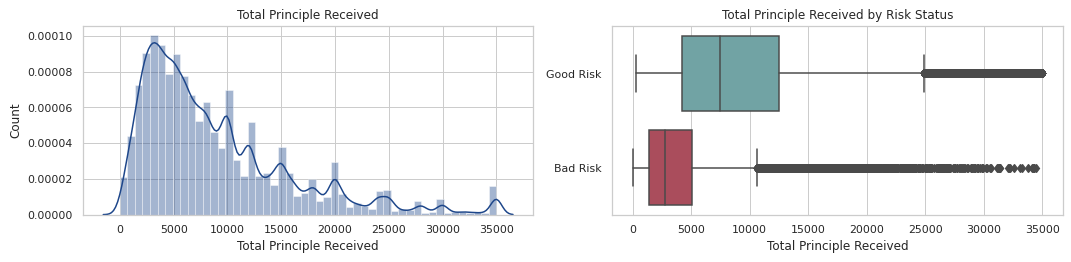

In [65]:
plot_var("total_rec_prncp", "Total Principle Received")

**Key Takeaways:**
1. Rentang total pokok yang diterima (total principal received) berkisar dari $0 hingga $35,000, dengan median (nilai tengah) sebesar $6,817.
2. Pinjaman dengan "Bad Risk" cenderung memiliki total pokok yang diterima yang lebih rendah. Ini mengindikasikan bahwa pemohon dengan total pokok yang diterima yang rendah kemungkinan besar tidak akan dapat melunasi pinjaman mereka.

Dengan kata lain, data menunjukkan bahwa secara umum, individu yang mendapatkan pinjaman dengan "Bad Risk" cenderung memiliki total pokok yang diterima yang lebih rendah, dan hal ini mungkin menandakan bahwa mereka menghadapi kesulitan dalam membayar kembali pinjaman mereka. Itu adalah kesimpulan yang dapat diambil dari pernyataan tersebut.

##### 6. Bivariate: Risk Status by Annual Income

In [66]:
df["annual_inc"].describe()

count    466285.000000
mean      73277.293307
std       54963.341145
min        1896.000000
25%       45000.000000
50%       63000.000000
75%       88953.000000
max     7500000.000000
Name: annual_inc, dtype: float64

In [67]:
df.groupby("risk_status")["annual_inc"].describe()

,count,mean,std,min,25%,50%,75%,max
risk_status,,,,,,,,
Bad Risk,52186.000000,65615.836951,41219.446894,2000.000000,41000.000000,57000.000000,80000.000000,1250000.000000
Good Risk,414099.000000,74242.813053,56384.722518,1896.000000,45000.000000,64000.000000,90000.000000,7500000.000000


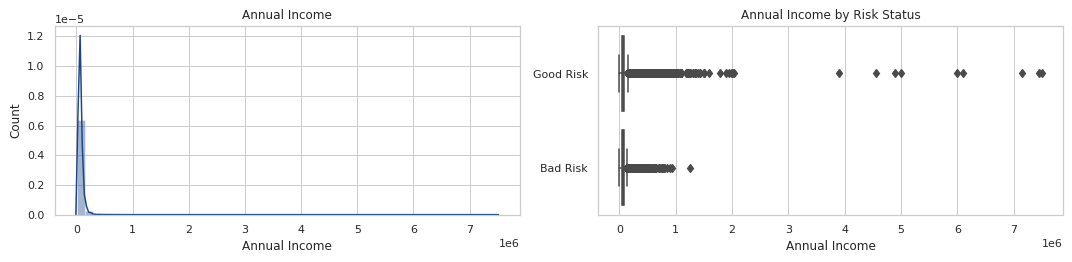

In [68]:
plot_var("annual_inc", "Annual Income")

**Key Takeaways:**
1. Rentang pendapatan tahunan dari para pemohon berkisar dari $1,896 hingga $7,500,000, dengan median (nilai tengah) sebesar $63,000.
2. Terlihat bahwa pemohon-pemohon dengan pendapatan yang lebih tinggi cenderung lebih mungkin untuk melunasi pinjaman mereka.

Dari pernyataan tersebut, dapat disimpulkan bahwa ada korelasi yang kuat antara tingkat pendapatan pemohon dan kemungkinan mereka untuk melunasi pinjaman. Individu dengan pendapatan yang lebih tinggi tampaknya lebih cenderung dapat memenuhi kewajiban pembayaran pinjaman mereka, sementara individu dengan pendapatan yang lebih rendah mungkin menghadapi kesulitan dalam membayar kembali pinjaman mereka. Ini adalah kesimpulan yang dapat diambil dari pernyataan tersebut.

##### 7. Bivariate: Risk Status by Installment

In [69]:
df["installment"].describe()

count   466285.000000
mean       432.061201
std        243.485550
min         15.670000
25%        256.690000
50%        379.890000
75%        566.580000
max       1409.990000
Name: installment, dtype: float64

In [70]:
df.groupby("risk_status")["installment"].describe()

,count,mean,std,min,25%,50%,75%,max
risk_status,,,,,,,,
Bad Risk,52186.000000,442.587052,246.432087,15.910000,266.995000,392.500000,574.400000,1408.130000
Good Risk,414099.000000,430.734701,243.079648,15.670000,255.040000,377.880000,565.180000,1409.990000


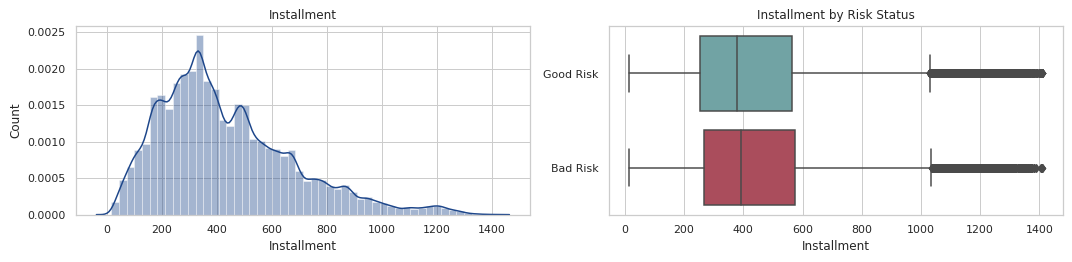

In [71]:
plot_var('installment', 'Installment')

**Key Takeaways:**
1. Rentang pembayaran angsuran (installments) per bulan berkisar dari $15.67 hingga $1,409.99, dengan median (nilai tengah) sebesar $379.89 per bulan.
2. Median dari pemohon dengan "Bad Risk" sedikit lebih tinggi daripada median dari pemohon dengan "Good Risk."

Dengan kata lain, pernyataan tersebut menyiratkan bahwa pemohon dengan "Bad Risk" cenderung menghadapi pembayaran angsuran yang lebih tinggi per bulan, secara rata-rata, dibandingkan dengan pemohon dengan "Good Risk". Hal ini didasarkan pada perbandingan median yang lebih tinggi untuk pemohon dengan risiko kredit buruk.

##### 8. Bivariate: Risk Status by Interest Rate

In [72]:
df["int_rate"].describe()

count   466285.000000
mean        13.829236
std          4.357587
min          5.420000
25%         10.990000
50%         13.660000
75%         16.490000
max         26.060000
Name: int_rate, dtype: float64

In [73]:
df.groupby("risk_status")["int_rate"].describe()

,count,mean,std,min,25%,50%,75%,max
risk_status,,,,,,,,
Bad Risk,52186.000000,15.973031,4.256379,5.420000,13.050000,15.610000,18.850000,26.060000
Good Risk,414099.000000,13.559068,4.294915,5.420000,10.490000,13.350000,16.290000,26.060000


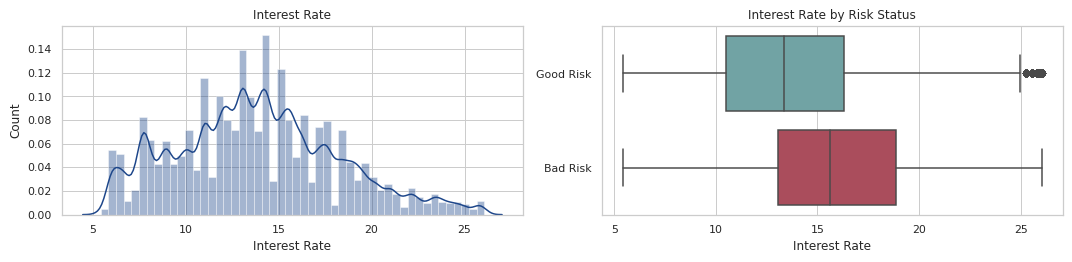

In [74]:
plot_var("int_rate", "Interest Rate")

**Key Takeaways:**
1. Rentang tingkat bunga pada pinjaman berkisar dari 5,42% hingga 26,06%, dengan median (nilai tengah) sebesar 13,6%.
2. Pinjaman dengan "Bad Risk" cenderung memiliki tingkat bunga yang lebih tinggi. Ini mengindikasikan bahwa pemohon dengan tingkat bunga yang tinggi memiliki tingkat peluang yang tinggi untuk tidak dapat melunasi pinjaman mereka.

Dari pernyataan tersebut, dapat disimpulkan bahwa ada korelasi antara tingkat bunga pinjaman dan risiko kredit. Pinjaman dengan tingkat bunga yang lebih tinggi, khususnya pada pinjaman dengan "Bad Risk", mungkin menandakan bahwa pemohon tersebut dianggap sebagai risiko yang lebih tinggi oleh pemberi pinjaman. Ini juga mengindikasikan bahwa pemohon dengan tingkat bunga yang tinggi mungkin menghadapi kesulitan dalam membayar kembali pinjaman mereka, terutama jika tingkat bunga tersebut signifikan.

##### 9. Bivariate: Risk Status by Others

In [75]:
num_columns

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

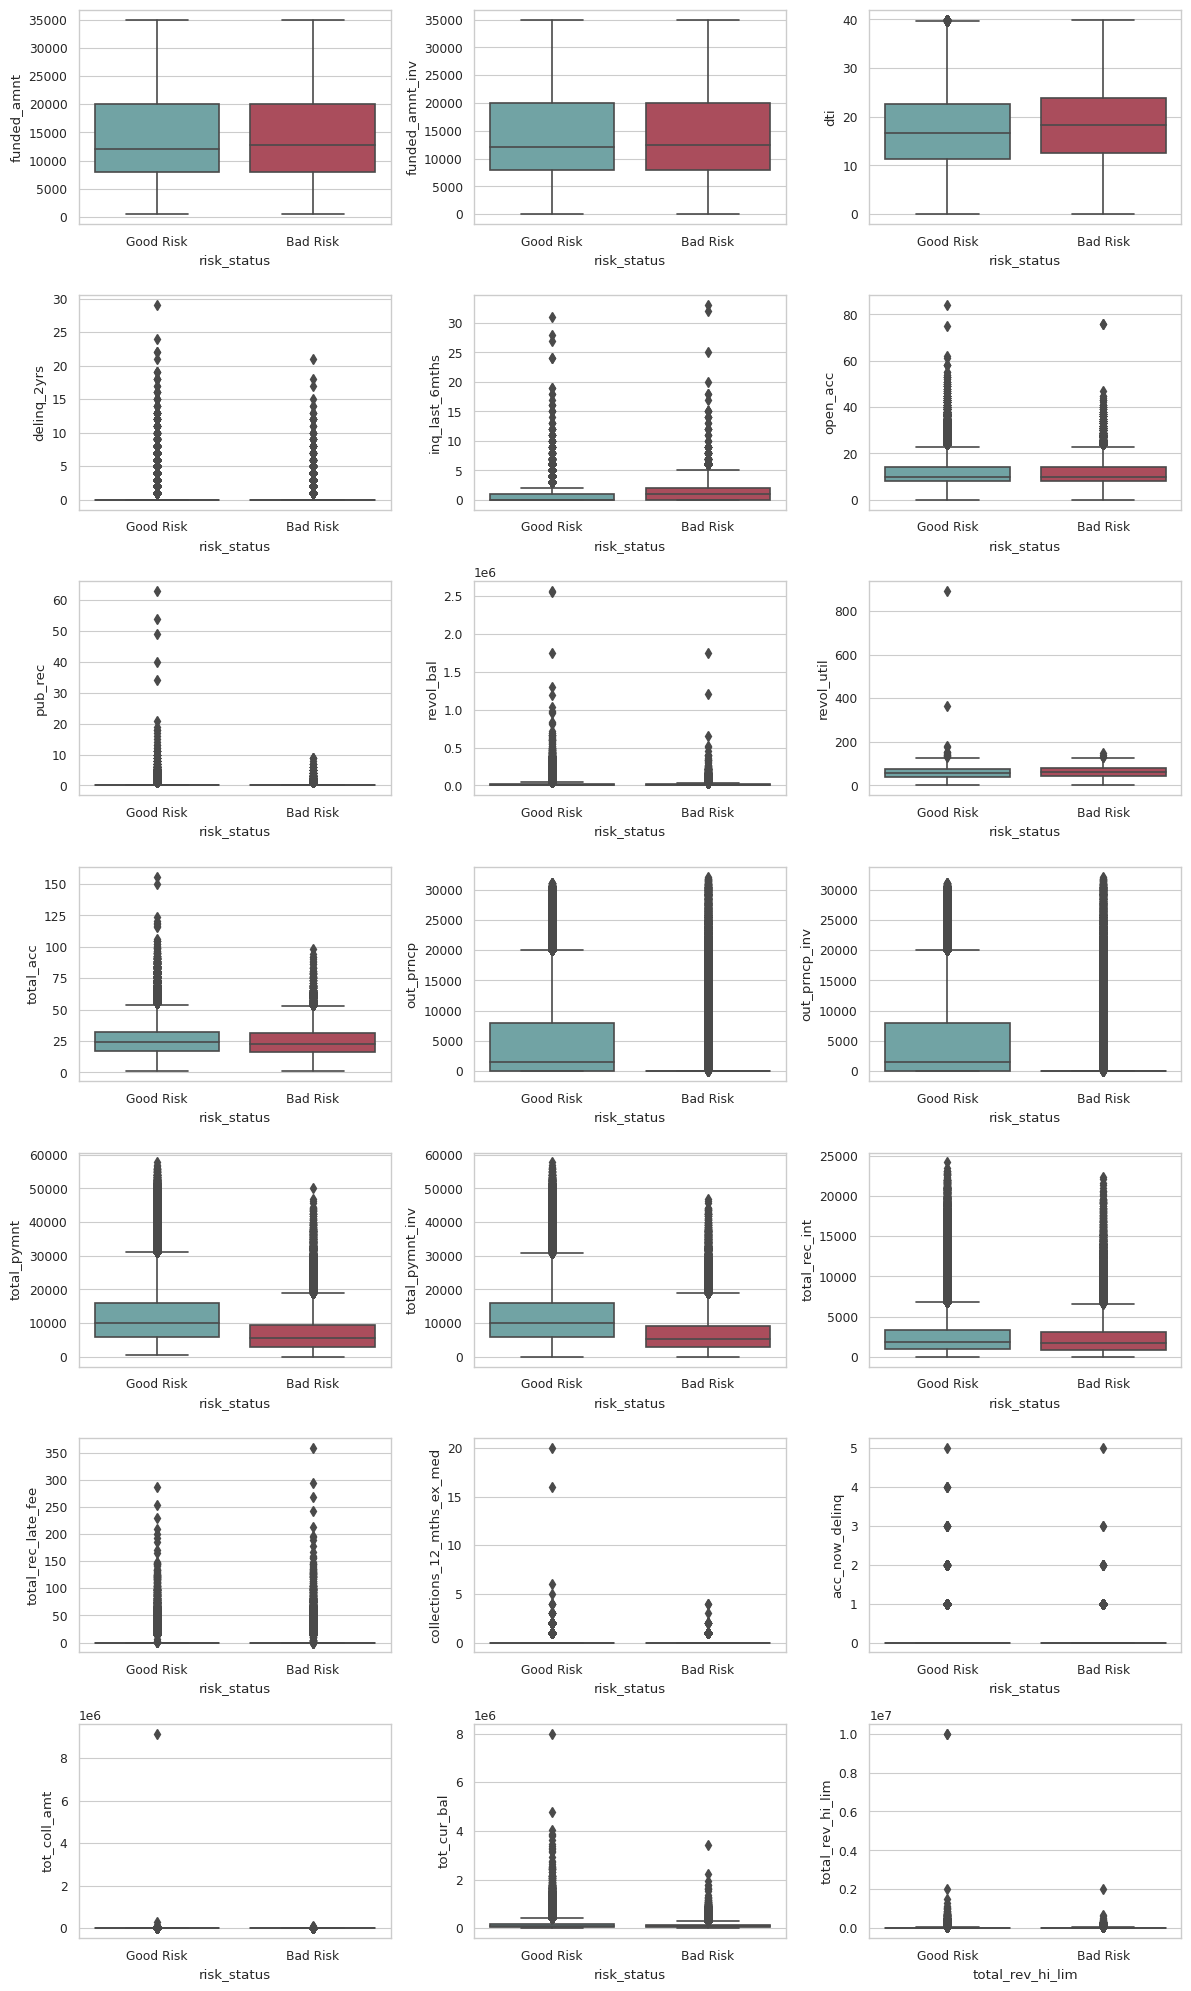

In [76]:
elements_to_remove = [0, 3, 4, 5, 18, 21, 22, 23]  # List elemen yang akan dihapus
my_list = [num_columns[x] for x in range(len(num_columns)) if x not in elements_to_remove]
my_list
# visualization
fig = plt.figure(figsize=(12,20))

for i in range(0, len(my_list)):
    plt.subplot(7,3,i+1)
    sns.boxplot(y=df[my_list[i]], x=df['risk_status'], palette =["#68abad", "#ba3d51"])
plt.xlabel(my_list[i])
plt.tight_layout()
plt.show()

In [77]:
print('Duplication status:', df.duplicated().values.any())
print('The number of duplication is:', df.duplicated().sum())

Duplication status: False
The number of duplication is: 0


### **5. Data Preprocessing**

Saya akan memisahkan fitur-fitur ini ke dalam hari, bulan, dan tahun.

`issue_d` : Bulan di mana pinjaman diberikan.

`earliest_cr_line` : Bulan ketika garis kredit pertama pemohon dilaporkan dibuka.

`last_pymnt_d` : Bulan terakhir pembayaran diterima.

`next_pymnt_d` : Tanggal pembayaran berikutnya yang dijadwalkan.

`last_credit_pull_d` : Bulan paling baru ketika LC (mungkin merujuk ke Lembaga Keuangan) mengambil laporan kredit untuk pinjaman ini.

In [78]:
df["issue_d_year"] = df["issue_d"].dt.year
df["issue_d_month"] = df["issue_d"].dt.month
df["issue_d_day"] = df["issue_d"].dt.day

df["earliest_cr_line_year"] = df["earliest_cr_line"].dt.year
df["earliest_cr_line_month"] = df["earliest_cr_line"].dt.month
df["earliest_cr_line_day"] = df["earliest_cr_line"].dt.day

df["last_pymnt_d_year"] = df["last_pymnt_d"].dt.year
df["last_pymnt_d_month"] = df["last_pymnt_d"].dt.month
df["last_pymnt_d_day"] = df["last_pymnt_d"].dt.day

df["next_pymnt_d_year"] = df["next_pymnt_d"].dt.year
df["next_pymnt_d_month"] = df["next_pymnt_d"].dt.month
df["next_pymnt_d_day"] = df["next_pymnt_d"].dt.day

df["last_credit_pull_d_year"] = df["last_credit_pull_d"].dt.year
df["last_credit_pull_d_month"] = df["last_credit_pull_d"].dt.month
df["last_credit_pull_d_day"] = df["last_credit_pull_d"].dt.day

# drop the original
df.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'], inplace=True, axis=1)

#### 5.1 Encoding

Ada 2 pilihan dalam mengkonversi fitur kategoris menjadi numerik, yaitu label encoding dan one hot encoding.

1. Terapkan One Hot Encoding ketika:

  - Fitur kategoris tidak bersifat ordinal, artinya tidak ada urutan tertentu di antara kategori-kategori tersebut.
  - Jumlah fitur kategoris relatif sedikit sehingga one-hot encoding dapat diterapkan dengan efektif.

2. Terapkan Label Encoding ketika:

  - Fitur kategoris bersifat ordinal.
  - Jumlah kategori yang ada dalam fitur tersebut cukup besar, sehingga one-hot encoding dapat mengakibatkan konsumsi memori yang tinggi.

##### 1. One Hot Encoding

`home_ownership`, `verification_status`, `pymnt_plan`, and `purpose` will be encoded using one hot encoding because these features is non-ordinal data.

In [79]:
df_1 = df.drop(['home_ownership', 'verification_status',
                'pymnt_plan', 'purpose'], axis=1)
cat_1 = df[['home_ownership', 'verification_status',
            'pymnt_plan', 'purpose']]

In [80]:
from sklearn.preprocessing import OneHotEncoder
oho = OneHotEncoder(sparse=False)

df_encoded = pd.DataFrame(oho.fit_transform(cat_1))
df_encoded.columns = oho.get_feature_names_out(['home_ownership',
                                            'verification_status',
                                            'pymnt_plan', 'purpose'])
concatenated_data = pd.concat([df_1, df_encoded], axis=1)
concatenated_data.sample()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,risk_status,issue_d_year,issue_d_month,issue_d_day,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_day,last_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_day,next_pymnt_d_year,next_pymnt_d_month,next_pymnt_d_day,last_credit_pull_d_year,last_credit_pull_d_month,last_credit_pull_d_day,home_ownership_MORTGAGE,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
210221,20000,20000,20000.000000,36 months,19.050000,733.630000,D,D4,9 years,87960.000000,15.210000,0.000000,1.000000,3.000000,0.000000,43183,96.800000,18.000000,Fractional Loan,0.000000,0.000000,26407.232360,26407.230000,20000.000000,6407.230000,0.000000,0.000000,0.000000,739.680000,0.000000,0.000000,0.000000,81539.000000,22800.000000,Good Risk,2012,7,1,1989,8,1,2015,7,1,2016,2,1,2016,1,1,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [81]:
concatenated_data['emp_length'].replace({'< 1 year':0, '1 year':1, '2 years':2,
                                           '3 years':3, '4 years':4, '5 years':5,
                                           '6 years':6, '7 years':7, '8 years':8,
                                           '9 years':9, '10+ years':10},inplace=True)

##### 2. Label Encoding

Fitur seperti `term`, `grade`, `sub_grade`, `risk_status`, dan `initial_list_status` biasanya tidak dienkoding menggunakan one-hot encoding karena mereka bukan data ordinal. Sebaliknya, mereka adalah data kategoris atau kualitatif.

Pilihan terbaik untuk mengenkoding data kategoris adalah menggunakan label encoding atau memetakan nilai-nilai unik dari setiap kategori ke angka-angka tertentu. Namun, Anda perlu berhati-hati ketika menggunakan label encoding pada data yang bukan ordinal karena metode ini dapat menimbulkan bias dalam analisis Anda.

In [82]:
from sklearn.preprocessing import LabelEncoder

# convert all non-numeric variables (ordinal) to numeric type
for column in concatenated_data.columns:
    if concatenated_data[column].dtype == np.number: continue
    # perform encoding for each non-numeric variables
    concatenated_data[column] = LabelEncoder().fit_transform(concatenated_data[column])

In [83]:
concatenated_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,risk_status,issue_d_year,issue_d_month,issue_d_day,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_day,last_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_day,next_pymnt_d_year,next_pymnt_d_month,next_pymnt_d_day,last_credit_pull_d_year,last_credit_pull_d_month,last_credit_pull_d_day,home_ownership_MORTGAGE,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,171,171,4975.000000,0,10.650000,162.870000,1,6,10,24000.000000,27.650000,0.000000,1.000000,3.000000,0.000000,13648,83.700000,9.000000,0,0.000000,0.000000,5861.071414,5831.780000,5000.000000,861.070000,0.000000,0.000000,0.000000,171.620000,0.000000,0.000000,0.000000,81539.000000,22800.000000,1,4,11,0,38,0,0,8,0,0,9,1,0,9,0,0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,71,71,2500.000000,1,15.270000,59.830000,2,13,0,30000.000000,1.000000,0.000000,5.000000,3.000000,0.000000,1687,9.400000,4.000000,0,0.000000,0.000000,1008.710000,1008.710000,456.460000,435.170000,0.000000,117.080000,1.110000,119.660000,0.000000,0.000000,0.000000,81539.000000,22800.000000,0,4,11,0,52,3,0,6,3,0,9,1,0,6,8,0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,67,67,2400.000000,0,15.960000,84.330000,2,14,10,12252.000000,8.720000,0.000000,2.000000,2.000000,0.000000,2956,98.500000,10.000000,0,0.000000,0.000000,3003.653644,3003.650000,2400.000000,603.650000,0.000000,0.000000,0.000000,649.910000,0.000000,0.000000,0.000000,81539.000000,22800.000000,1,4,11,0,54,10,0,7,5,0,9,1,0,9,0,0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
3,371,371,10000.000000,0,13.490000,339.310000,2,10,10,49200.000000,20.000000,0.000000,1.000000,10.000000,0.000000,5598,21.000000,37.000000,0,0.000000,0.000000,12226.302210,12226.300000,10000.000000,2209.330000,16.970000,0.000000,0.000000,357.480000,0.000000,0.000000,0.000000,81539.000000,22800.000000,1,4,11,0,49,1,0,8,0,0,9,1,0,8,0,0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
4,91,91,3000.000000,1,12.690000,67.790000,1,9,1,80000.000000,17.940000,0.000000,0.000000,15.000000,0.000000,27774,53.900000,38.000000,0,766.900000,766.900000,3242.170000,3242.170000,2233.100000,1009.070000,0.000000,0.000000,0.000000,67.790000,0.000000,0.000000,0.000000,81539.000000,22800.000000,1,4,11,0,49,0,0,9,0,0,9,1,0,9,0,0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


#### 5.2 Feature Selection

In [84]:
data = concatenated_data

In [85]:
corr = abs(data.corrwith(data["risk_status"]))
corr.reset_index(name='corr value').sort_values('corr value', ascending=False)

,index,corr value
34,risk_status,1.000000
26,recoveries,0.435352
27,collection_recovery_fee,0.295281
23,total_rec_prncp,0.254255
41,last_pymnt_d_year,0.252786
22,total_pymnt_inv,0.194638
21,total_pymnt,0.193977
4,int_rate,0.174648
7,sub_grade,0.171832
28,last_pymnt_amnt,0.170164


**Key Takeaways:**
1. Recoveries memiliki korelasi tinggi dengan status risiko. Ini berarti bahwa recoveries memiliki pengaruh signifikan pada status risiko, dan perubahan dalam recoveries akan berdampak kuat pada status risiko.

2. `Collection_recovery_fee`, `total_rec_prncp`, `last_pymnt_d_year`, `total_pymnt_inv`, `total_pymnt`, `last_pymnt_amnt`, `out_prncp`, `out_prncp_inv`, `total_rec_late_fee`, `grade`, `sub_grade`, `int_rate`, `last_credit_pull_d_year`, `last_credit_pull_d_month`, dan `last_pymnt_d_month` juga memiliki korelasi yang relatif rendah dengan status risiko, tetapi nilainya masih lebih tinggi dari korelasi dengan fitur lainnya (korelasi > 0.10). Ini menunjukkan bahwa meskipun korelasi mereka tidak sekuat recoveries, mereka masih memiliki pengaruh yang cukup besar terhadap status risiko dan dapat digunakan dalam analisis atau pemodelan untuk memahami faktor-faktor yang memengaruhi status risiko.

Korelasi adalah ukuran statistik yang digunakan untuk mengukur hubungan antara dua variabel. Nilai korelasi berkisar antara -1 (korelasi negatif sempurna) hingga 1 (korelasi positif sempurna), dengan 0 menunjukkan tidak ada korelasi. Dalam konteks ini, korelasi positif antara fitur-fitur ini dan status risiko menunjukkan bahwa saat fitur-fitur tersebut meningkat, kemungkinan risiko juga meningkat, dan sebaliknya.

<Axes: >

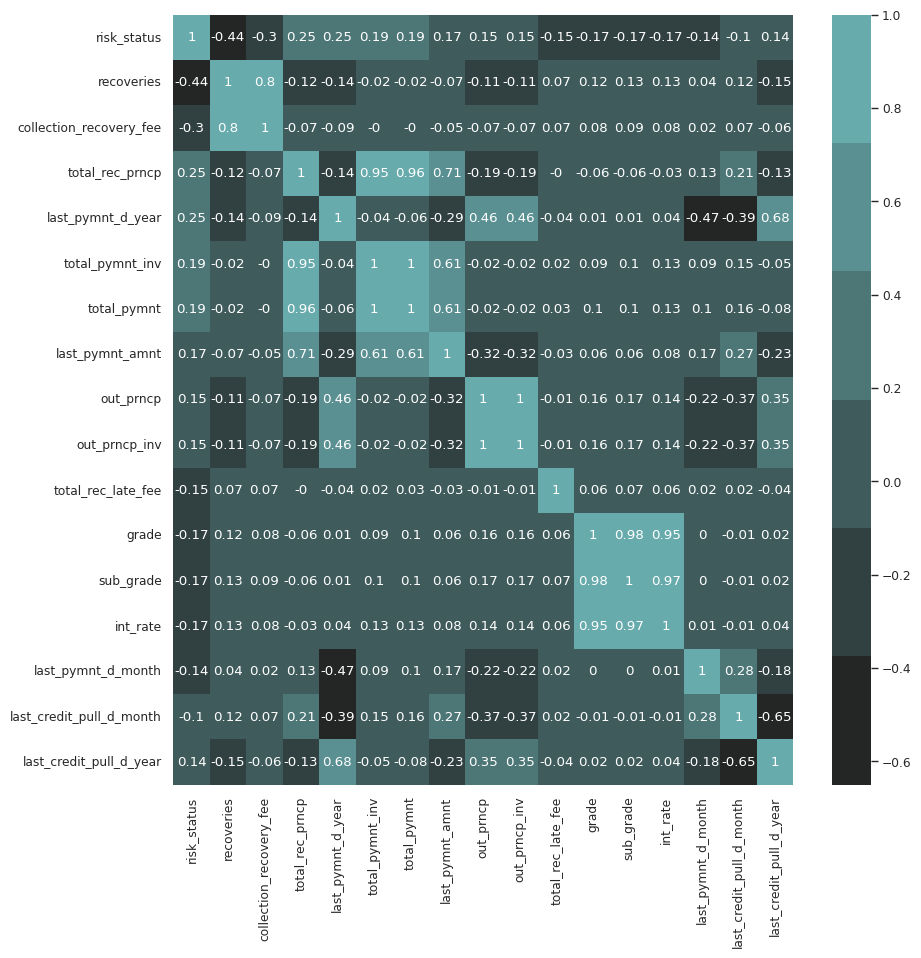

In [86]:
# let's only include the features mentioned above
fig = plt.figure(figsize = (10,10))
corr_data = concatenated_data[['risk_status', 'recoveries', 'collection_recovery_fee', 'total_rec_prncp' , 'last_pymnt_d_year',
                               'total_pymnt_inv', 'total_pymnt', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv',
                               'total_rec_late_fee', 'grade', 'sub_grade', 'int_rate', 'last_pymnt_d_month',
                              'last_credit_pull_d_month', 'last_credit_pull_d_year']]
sns.heatmap(round(corr_data.corr(),2),cmap=sns.dark_palette("#68abad"), annot = True)

In [87]:
data = concatenated_data[['risk_status', 'recoveries', 'collection_recovery_fee', 'total_rec_prncp' , 'last_pymnt_d_year',
                               'total_pymnt_inv', 'total_pymnt', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv',
                               'total_rec_late_fee', 'grade', 'sub_grade', 'int_rate', 'last_pymnt_d_month',
                              'last_credit_pull_d_month', 'last_credit_pull_d_year']]

#### 5.3 Handling Imbalanced Data

In [88]:
# define X and y
X = data.drop(['risk_status'], axis=1) #features
y = data['risk_status'] #target

In [89]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) # good risk
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0))) # bad risk

# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_balanced_res, y_balanced_res = sm.fit_resample(X, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_balanced_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_balanced_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_balanced_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced_res == 0)))

Before OverSampling, counts of label '1': 414099
Before OverSampling, counts of label '0': 52186 

After OverSampling, the shape of train_X: (828198, 16)
After OverSampling, the shape of train_y: (828198,) 

After OverSampling, counts of label '1': 414099
After OverSampling, counts of label '0': 414099


#### 5.4 Splitting

In [90]:
from sklearn.model_selection import train_test_split

# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(X_balanced_res, y_balanced_res, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(662558, 16) (165640, 16)


### **6. Modeling and Evaluation**

6.1 Decision Tree Classifier

6.2 Random Forest Classifier

6.3 Logistic Regression

6.4 Gaussian Naive Bayes

6.5 XGBoost Classifier

In [91]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neural_network import MLPClassifier #neural network
from xgboost import XGBRFClassifier #xgboost
from sklearn.metrics import confusion_matrix, classification_report

# train the model
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
rf_model = RandomForestClassifier().fit(X_train, y_train)
log_model = LogisticRegression().fit(X_train, y_train)
gnb_model = GaussianNB().fit(X_train, y_train)
xgb_model = XGBRFClassifier().fit(X_train, y_train)

#### 6.1 Decision Tree Classifier

Classification Report Training Model (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    331148
           1       1.00      1.00      1.00    331410

    accuracy                           1.00    662558
   macro avg       1.00      1.00      1.00    662558
weighted avg       1.00      1.00      1.00    662558



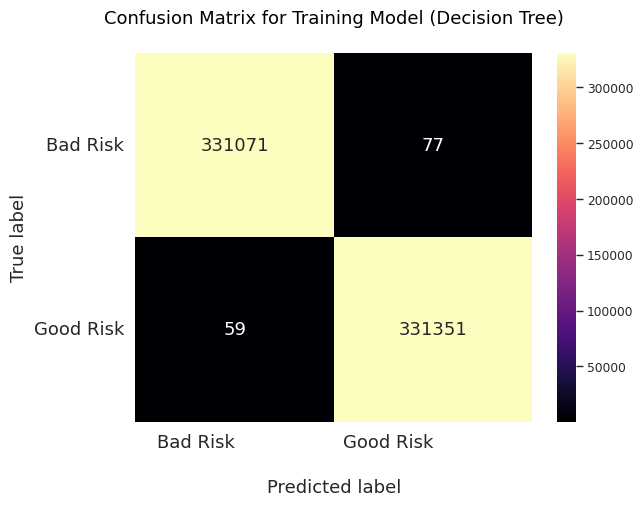

In [92]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree):')
print(classification_report(y_train, y_train_pred_dt))

# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 13}, fmt='d', cmap='magma')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Decision Tree)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Classification Report Testing Model (Decision Tree):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82951
           1       0.99      0.99      0.99     82689

    accuracy                           0.99    165640
   macro avg       0.99      0.99      0.99    165640
weighted avg       0.99      0.99      0.99    165640



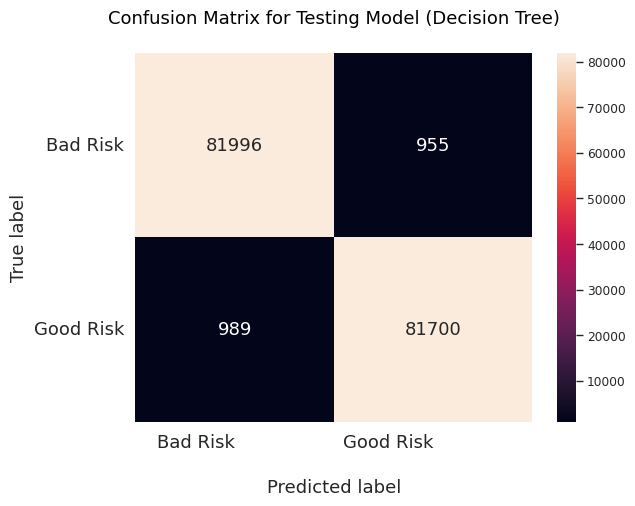

In [93]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree):')
print(classification_report(y_test, y_test_pred_dt))

# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 13}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Decision Tree)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

In [94]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_dt_train))
print("Testing Accuracy: {} %".format(acc_dt_test))

Training Accuracy: 99.98 %
Testing Accuracy: 98.83 %


#### 6.2 Random Forest Classifier

Classification Report Training Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    331148
           1       1.00      1.00      1.00    331410

    accuracy                           1.00    662558
   macro avg       1.00      1.00      1.00    662558
weighted avg       1.00      1.00      1.00    662558



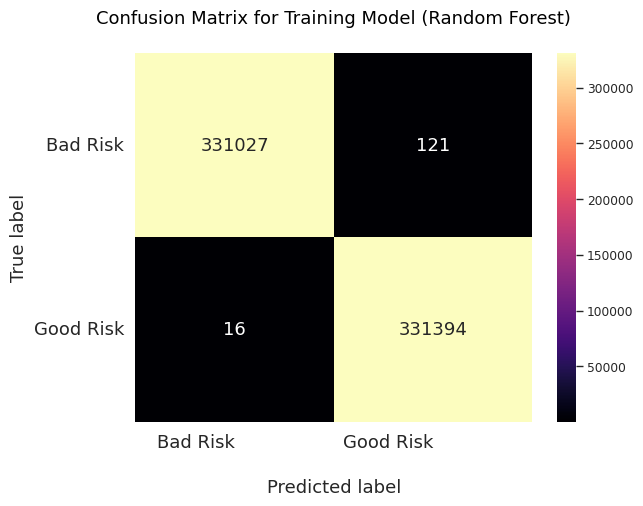

In [95]:
# predict data train
y_train_pred_rf = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Random Forest):')
print(classification_report(y_train, y_train_pred_rf))

# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rf)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 13}, fmt='d', cmap='magma')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Random Forest)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Classification Report Testing Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     82951
           1       0.99      1.00      0.99     82689

    accuracy                           0.99    165640
   macro avg       0.99      0.99      0.99    165640
weighted avg       0.99      0.99      0.99    165640



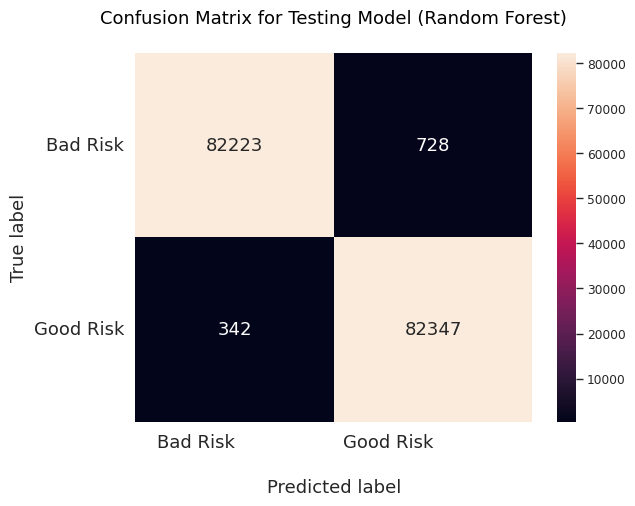

In [96]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Random Forest):')
print(classification_report(y_test, y_test_pred_rf))

# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 13}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Random Forest)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

In [97]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_rf_train))
print("Test Accuracy: {} %".format(acc_rf_test))

Training Accuracy: 99.98 %
Test Accuracy: 99.35 %


#### 6.3 Logistic Regression

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.88      0.87      0.88    331148
           1       0.88      0.88      0.88    331410

    accuracy                           0.88    662558
   macro avg       0.88      0.88      0.88    662558
weighted avg       0.88      0.88      0.88    662558



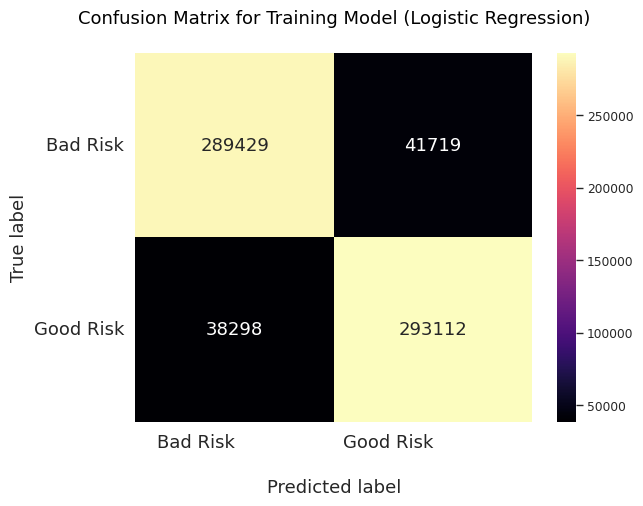

In [98]:
# predict data train
y_train_pred_log = log_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 13}, fmt='d', cmap='magma')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Logistic Regression)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     82951
           1       0.88      0.89      0.88     82689

    accuracy                           0.88    165640
   macro avg       0.88      0.88      0.88    165640
weighted avg       0.88      0.88      0.88    165640



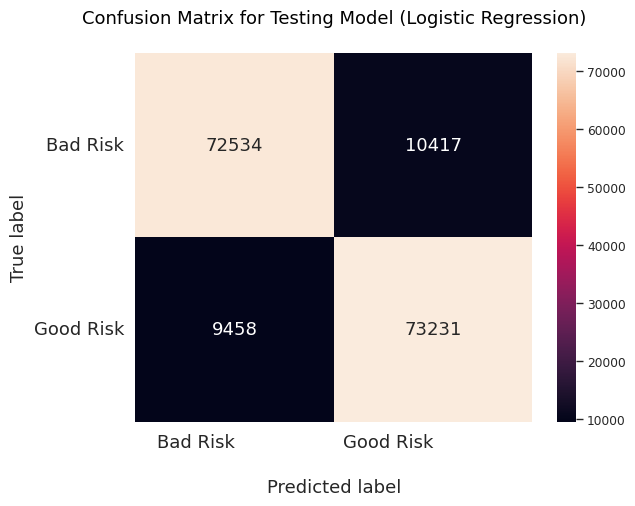

In [99]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 13}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Logistic Regression)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

In [100]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_log_train))
print("Test Accuracy: {} %".format(acc_log_test))

Training Accuracy: 87.92 %
Test Accuracy: 88.0 %


#### 6.4 Gaussian Naive Bayes

Classification Report Training Model (Naive Bayes):
              precision    recall  f1-score   support

           0       0.99      0.51      0.67    331148
           1       0.67      0.99      0.80    331410

    accuracy                           0.75    662558
   macro avg       0.83      0.75      0.74    662558
weighted avg       0.83      0.75      0.74    662558



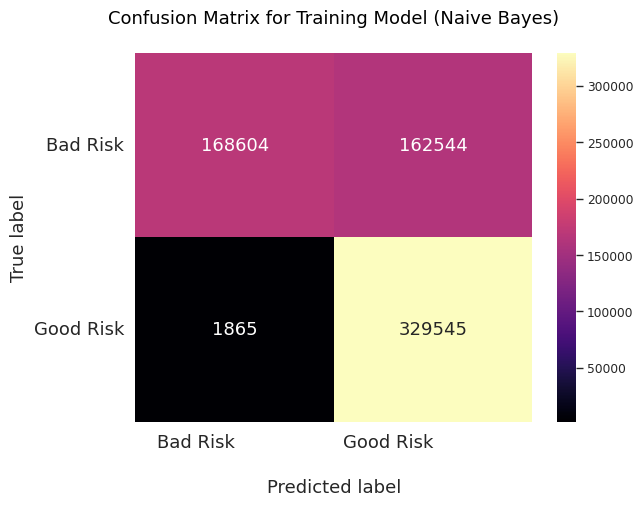

In [101]:
# predict data train
y_train_pred_gnb = gnb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Naive Bayes):')
print(classification_report(y_train, y_train_pred_gnb))

# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gnb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='magma')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Naive Bayes)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Classification Report Testing Model (Naive Bayes):
              precision    recall  f1-score   support

           0       0.99      0.51      0.67     82951
           1       0.67      0.99      0.80     82689

    accuracy                           0.75    165640
   macro avg       0.83      0.75      0.74    165640
weighted avg       0.83      0.75      0.74    165640



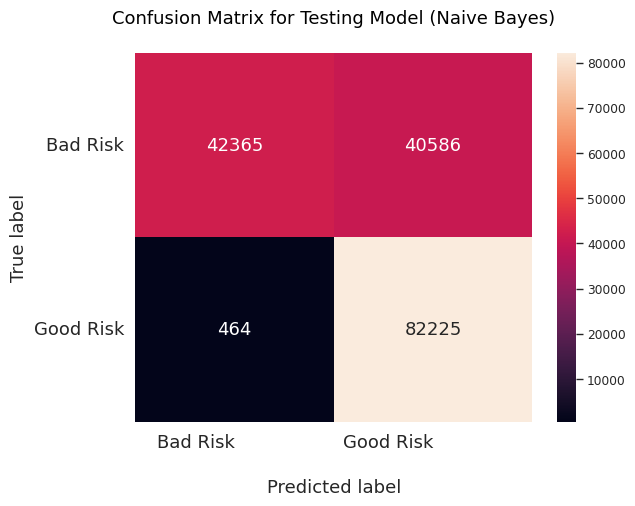

In [102]:
# predict data test
y_test_pred_gnb = gnb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Naive Bayes):')
print(classification_report(y_test, y_test_pred_gnb))

# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gnb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 13}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Naive Bayes)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

In [103]:
acc_gnb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_gnb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_gnb_train))
print("Test Accuracy: {} %".format(acc_gnb_test))

Training Accuracy: 75.19 %
Test Accuracy: 75.22 %


#### 6.5 XGBoost Classifier

Classification Report Training Model (XGBoost Classifier):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    331148
           1       0.97      0.95      0.96    331410

    accuracy                           0.96    662558
   macro avg       0.96      0.96      0.96    662558
weighted avg       0.96      0.96      0.96    662558



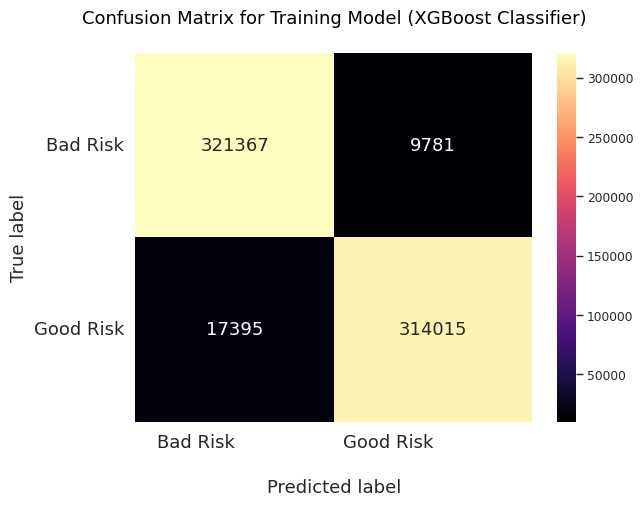

In [104]:
# predict data train
y_train_pred_xgb = xgb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (XGBoost Classifier):')
print(classification_report(y_train, y_train_pred_xgb))

# form confusion matrix as a dataFrame
confusion_matrix_xgb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_xgb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_xgb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='magma')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (XGBoost Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Classification Report Testing Model (XGBoost Classifier):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     82951
           1       0.97      0.95      0.96     82689

    accuracy                           0.96    165640
   macro avg       0.96      0.96      0.96    165640
weighted avg       0.96      0.96      0.96    165640



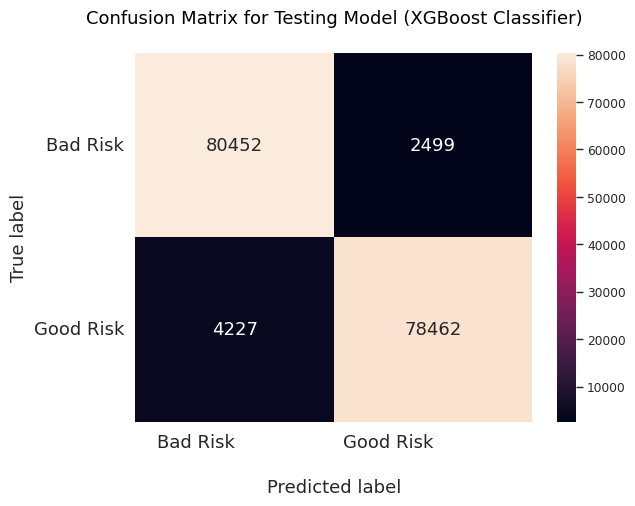

In [105]:
# predict data test
y_test_pred_xgb = xgb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (XGBoost Classifier):')
print(classification_report(y_test, y_test_pred_xgb))

# form confusion matrix as a dataFrame
confusion_matrix_xgb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_xgb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_xgb, annot=True, annot_kws={'size': 13}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (XGBoost Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

In [106]:
acc_xgb_train=round(xgb_model.score(X_train,y_train)*100,2)
acc_xgb_test=round(xgb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_xgb_train))
print("Test Accuracy: {} %".format(acc_xgb_test))

Training Accuracy: 95.9 %
Test Accuracy: 95.94 %


#### MODEL COMPARISON

In [107]:
results = pd.DataFrame([["Decision Tree", acc_dt_train, acc_dt_test, abs(acc_dt_train-acc_dt_test)],
                        ["Random Forest", acc_rf_train, acc_rf_test, abs(acc_rf_train-acc_rf_test)],
                        ["Logistic Regression", acc_log_train, acc_log_test, abs(acc_log_train-acc_log_test)],
                        ["Naive Bayes", acc_gnb_train, acc_gnb_test, abs(acc_gnb_train-acc_gnb_test)],
                        ["XGBoost  Classifier", acc_xgb_train, acc_xgb_test, abs(acc_xgb_train-acc_xgb_test)]],
                        columns = ["Models", "Training Accuracy Score (%)", "Testing Accuracy Score (%)", "Error Margin (%)"])

results

,Models,Training Accuracy Score (%),Testing Accuracy Score (%),Error Margin (%)
0,Decision Tree,99.980000,98.830000,1.150000
1,Random Forest,99.980000,99.350000,0.630000
2,Logistic Regression,87.920000,88.000000,0.080000
3,Naive Bayes,75.190000,75.220000,0.030000
4,XGBoost Classifier,95.900000,95.940000,0.040000


### **7. Conclusion**

1. **Evaluasi Model**: `Model Random Forest` adalah model terbaik untuk memprediksi status risiko peminjaman di antara berbagai model yang dievaluasi. Model Decision Tree juga memiliki akurasi tinggi pada data pelatihan, tetapi Model Random Forest lebih baik dalam hal perbedaan akurasi antara data pelatihan dan pengujian. Model Random Forest menunjukkan kemampuan generalisasi yang lebih baik dibandingkan dengan Model XGBoost.

  - Model Random Forest: Model ini dianggap sebagai yang terbaik untuk prediksi risiko peminjaman karena kinerjanya yang kuat pada data pelatihan dan pengujian.
  - Model Decision Tree: Model ini juga menunjukkan akurasi tinggi pada data pelatihan, tetapi mungkin mengalami overfitting, sebagaimana ditunjukkan oleh perbedaan akurasi yang lebih besar antara data pelatihan dan pengujian.
  - Model XGBoost: Meskipun model ini memiliki nilai akurasi yang tinggi, kinerjanya tidak sebaik model Random Forest, terutama dalam hal generalisasi pada data pengujian.

2. **Fitur Utama**: Lima fitur paling berkorelasi dalam menentukan kemungkinan pelunasan pinjaman mencakup `recoveries`, `collection_recovery_fee`, `total_resc_prncp`, `last_pymnt_d_year`, dan `total_pymnt_inv`. Fitur-fitur yang disebutkan adalah yang paling berkorelasi dalam menilai risiko pelunasan pinjaman. Ini berarti bahwa faktor-faktor ini secara kuat memengaruhi apakah seorang pelamar cenderung melunasi pinjamannya atau tidak.

3. **Strategi Mitigasi Risiko**: Rekomendasi strategi untuk menghadapi pelamar yang menunjukkan indikator risiko tinggi. Jika pelamar memiliki karakteristik yang terkait dengan risiko tinggi dalam tidak melunasi pinjaman, perusahaan sebaiknya mempertimbangkan tindakan seperti menolak aplikasi pinjaman mereka, mengurangi jumlah pinjaman, atau mengenakan suku bunga yang lebih tinggi. Strategi ini bertujuan untuk mengurangi risiko finansial keseluruhan bagi perusahaan.